In [1]:
import numpy as np
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

# set directry
os.chdir('/Users/celerinoue/0_res/CTOS/')

In [2]:
# [LOAD] ECv data
file_1 = 'data/ECv_network_result_0.15.txt'
data_ecv_ = pd.read_table(file_1, sep='\t', header=0)
print(f'[LOAD]: {file_1}, input matrix: {data_ecv_.shape}')

# [LOAD] tumor growth rate data
file_2 = 'result/matrix/tumor_growth_rate.pickle'
with open(file_2, 'rb') as f:
  list_gr_ = pickle.load(f)
  print(f'[LOAD]: {file_2}, list length: {len(list_gr_)}')

# [LOAD] drug name list
file_3 = 'result/matrix/drug_index.csv'
data_drug_name = pd.read_csv(file_3, sep=',', header=0, index_col=0)
print(f'[LOAD]: {file_3}, input matrix: {data_drug_name.shape}')

[LOAD]: data/ECv_network_result_0.15.txt, input matrix: (78859, 52)
[LOAD]: result/matrix/tumor_growth_rate.pickle, list length: 7
[LOAD]: result/matrix/drug_index.csv, input matrix: (7, 2)


In [3]:
# reshape data_ecv
data_ecv = data_ecv_.loc[:,['Parent', 
                            'Child',
                            'ECv:C97-float:8', # CTOS_line = 1
                            'ECv:C166-float:21', # CTOS_line = 2
                            'ECv:C86-float:17', # CTOS_line = 3
                            'ECv:C111-foat:18', # CTOS_line = 4
                            'ECv:C45-float:5', # CTOS_line = 5
                            'ECv:C48-float:6', # CTOS_line = 6
                            'ECv:C138-float:20', # CTOS_line = 7
                            'ECv:CB3-float:22', # CTOS_line = 8
                            'ECv:C75-float:7', # CTOS_line = 9
                            'ECv:C132-float:19' # CTOS_line = 10
                            ]] # 必要なedgeを抽出

# reshape list_gr
list_gr_d28 = []
for i in range(len(list_gr_)):
    gr_d28_ = list_gr_[i].iloc[:,8:]
    list_gr_d28.append(gr_d28_)

# corr
相関係数のプロット

In [4]:
list_corr_ = []
for d, i in itertools.product(range(len(data_drug_name['drug_name'])), range(len(data_ecv))):
    # array tumor growth rate
    array_gr = np.array(list_gr_d28[d], dtype='float64').reshape(
        10,)  # drug 0~6 → 1
    # array ecv
    array_ecv = np.array(
        data_ecv.iloc[i, 2:], dtype='float64')  # ecv 0~78858 → 1
    # corr
    corr = np.corrcoef(array_gr, array_ecv)[0, 1]
    # append
    list_corr_.append(corr)
#reshape
list_corr = np.array(list_corr_).reshape(len(data_drug_name['drug_name']), -1)

In [10]:
list_corr.shape

(7, 78859)

In [15]:
list_corr[0]

array([-0.1307897 ,  0.14157399,  0.27539283, ..., -0.3639601 ,
       -0.04872106,  0.08870132])

In [16]:
list_corr[1]

array([ 0.69102772, -0.28578002, -0.21581707, ..., -0.0513697 ,
       -0.50432342,  0.19037382])

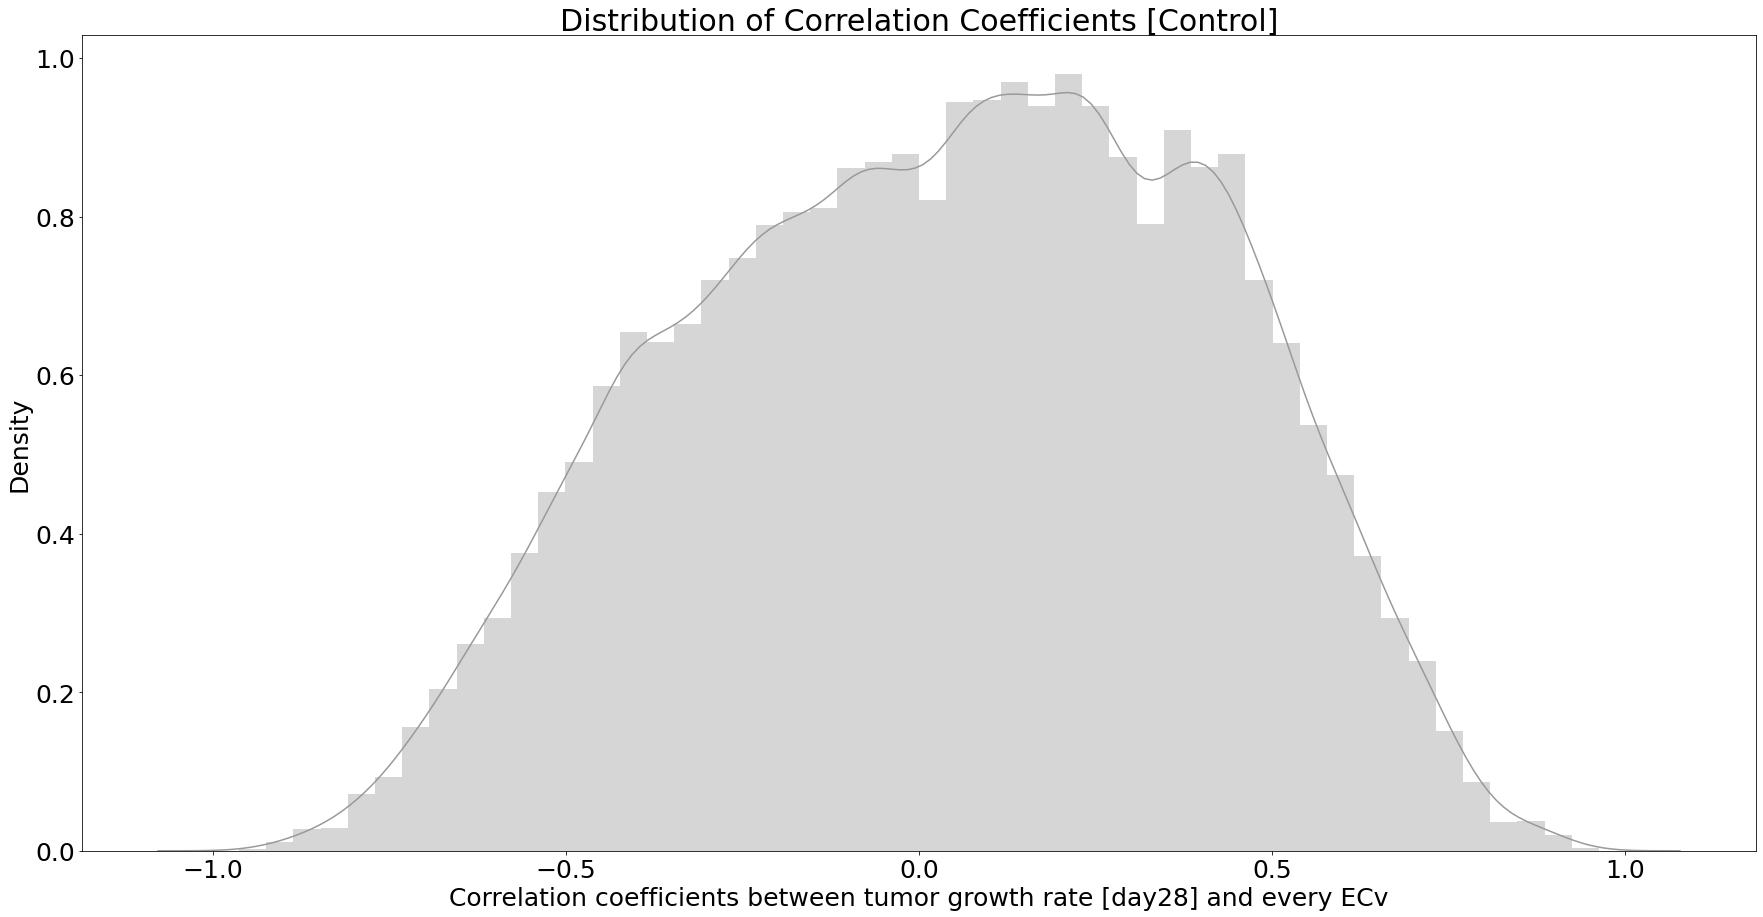

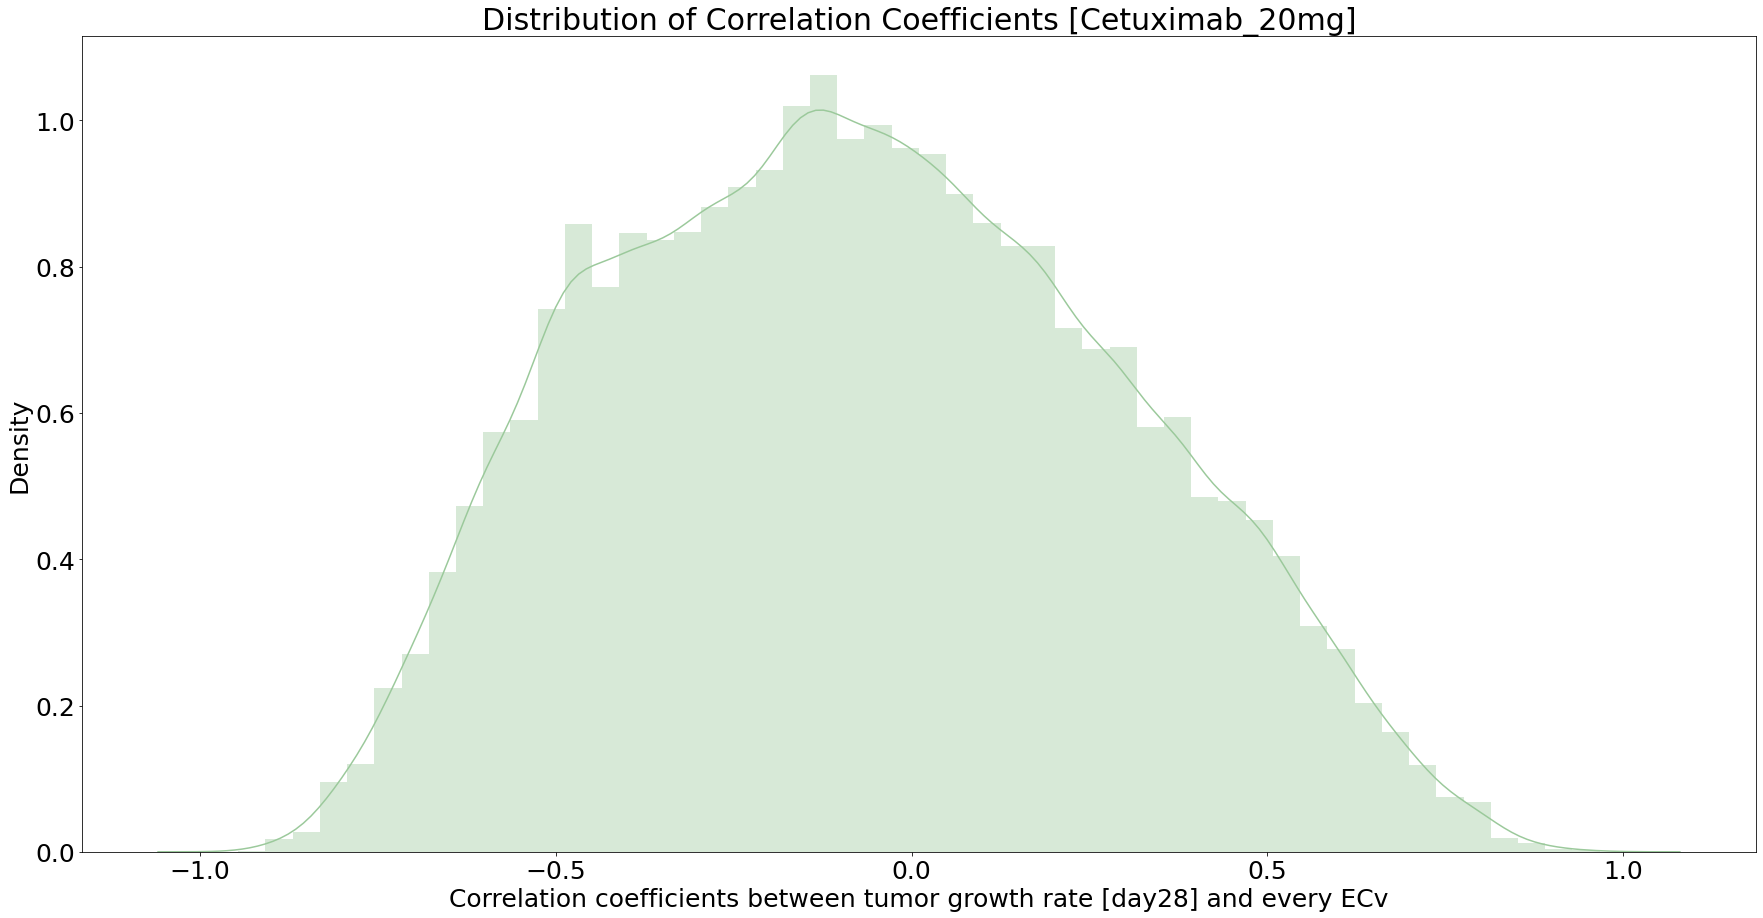

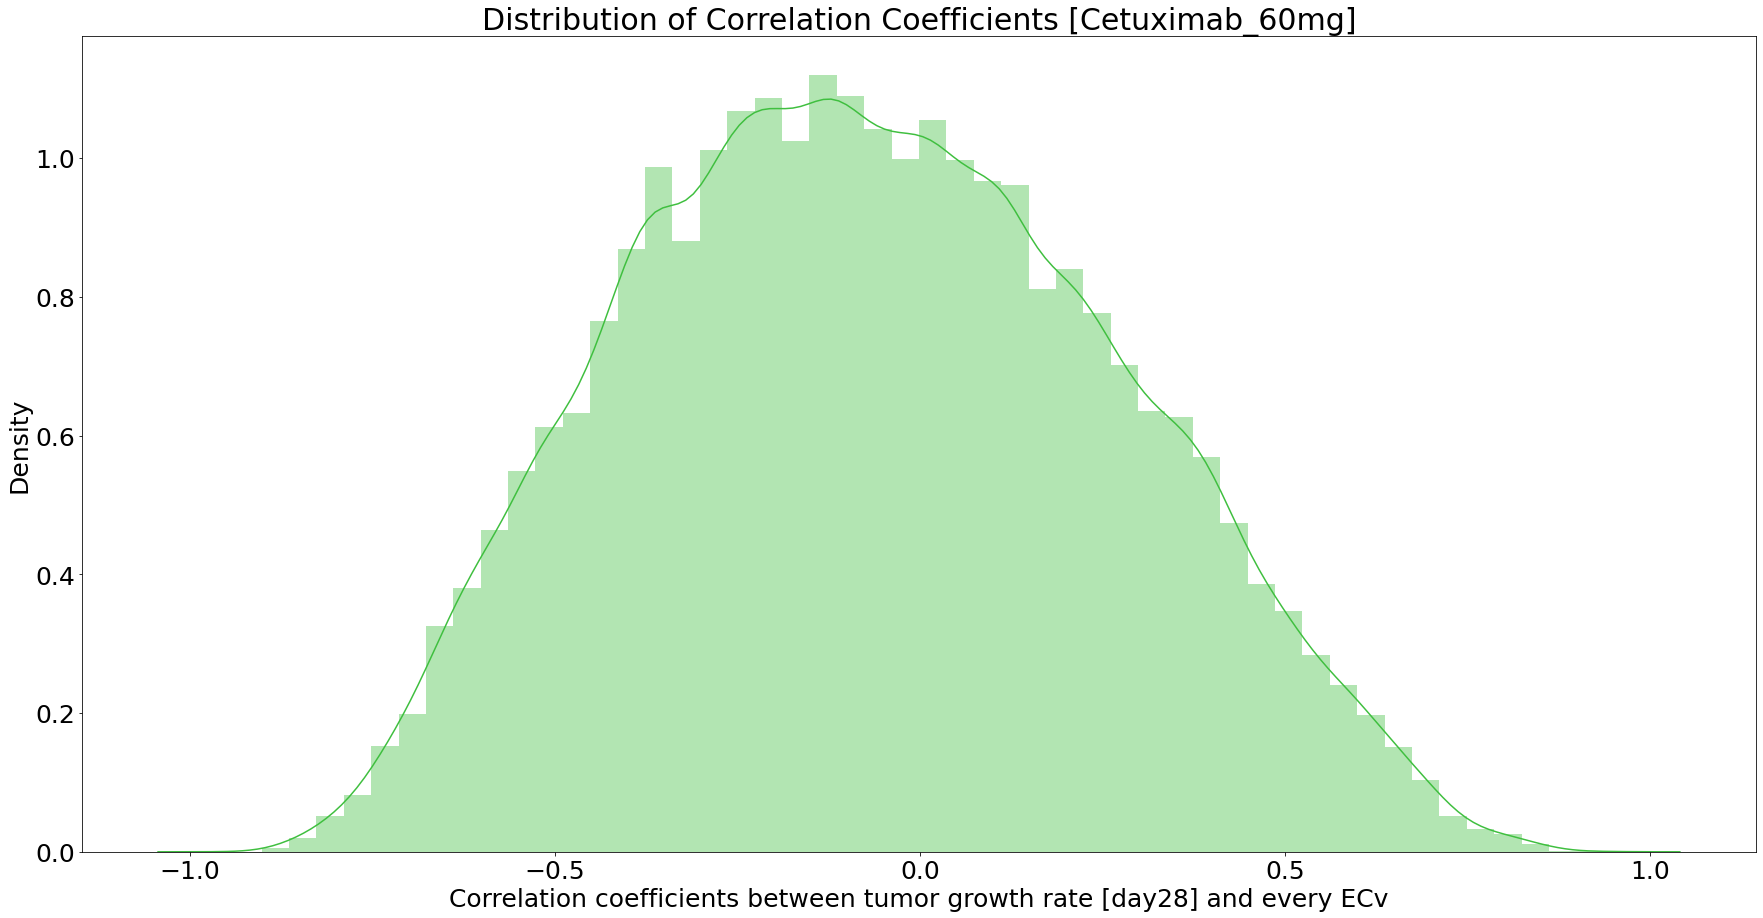

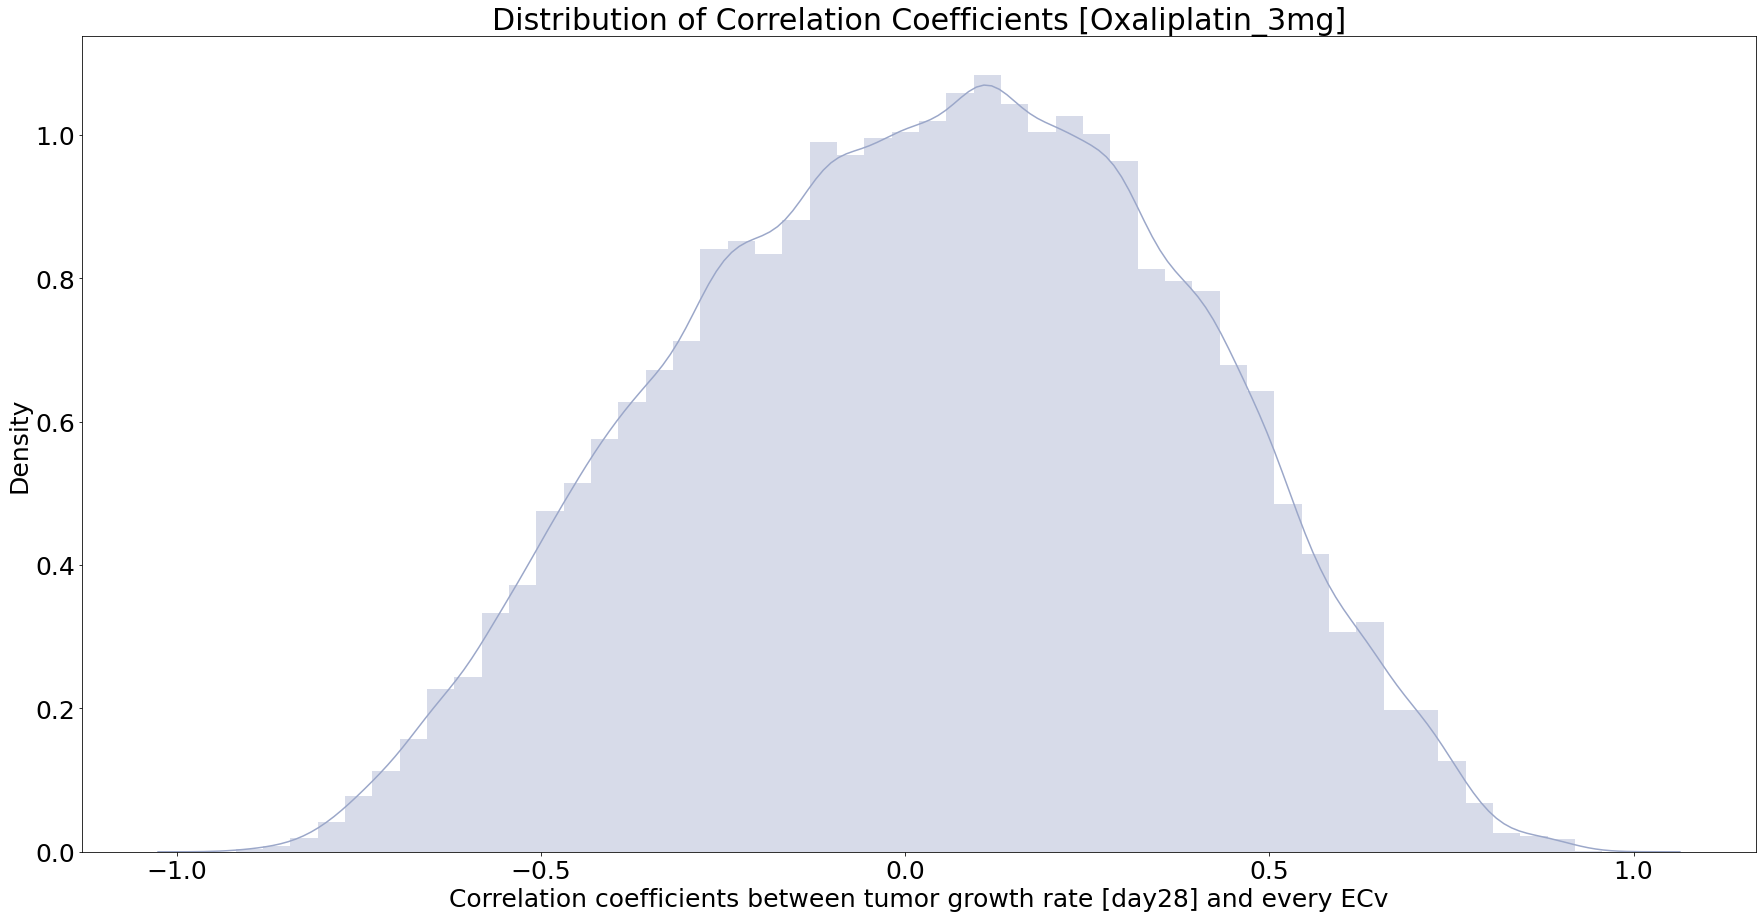

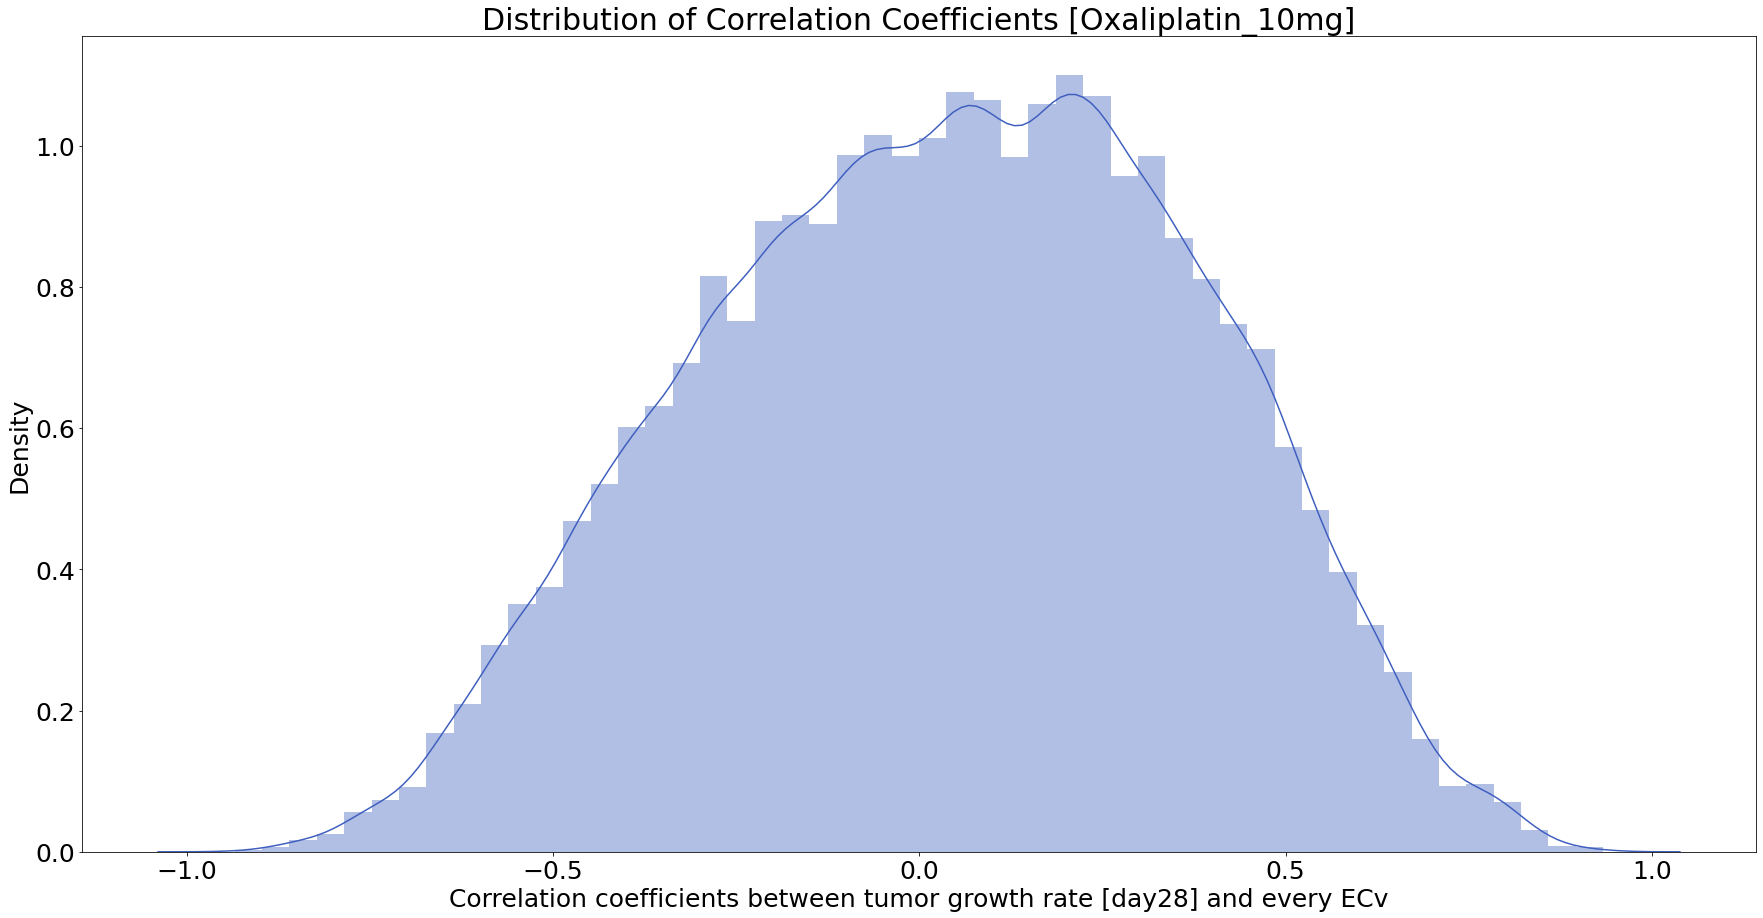

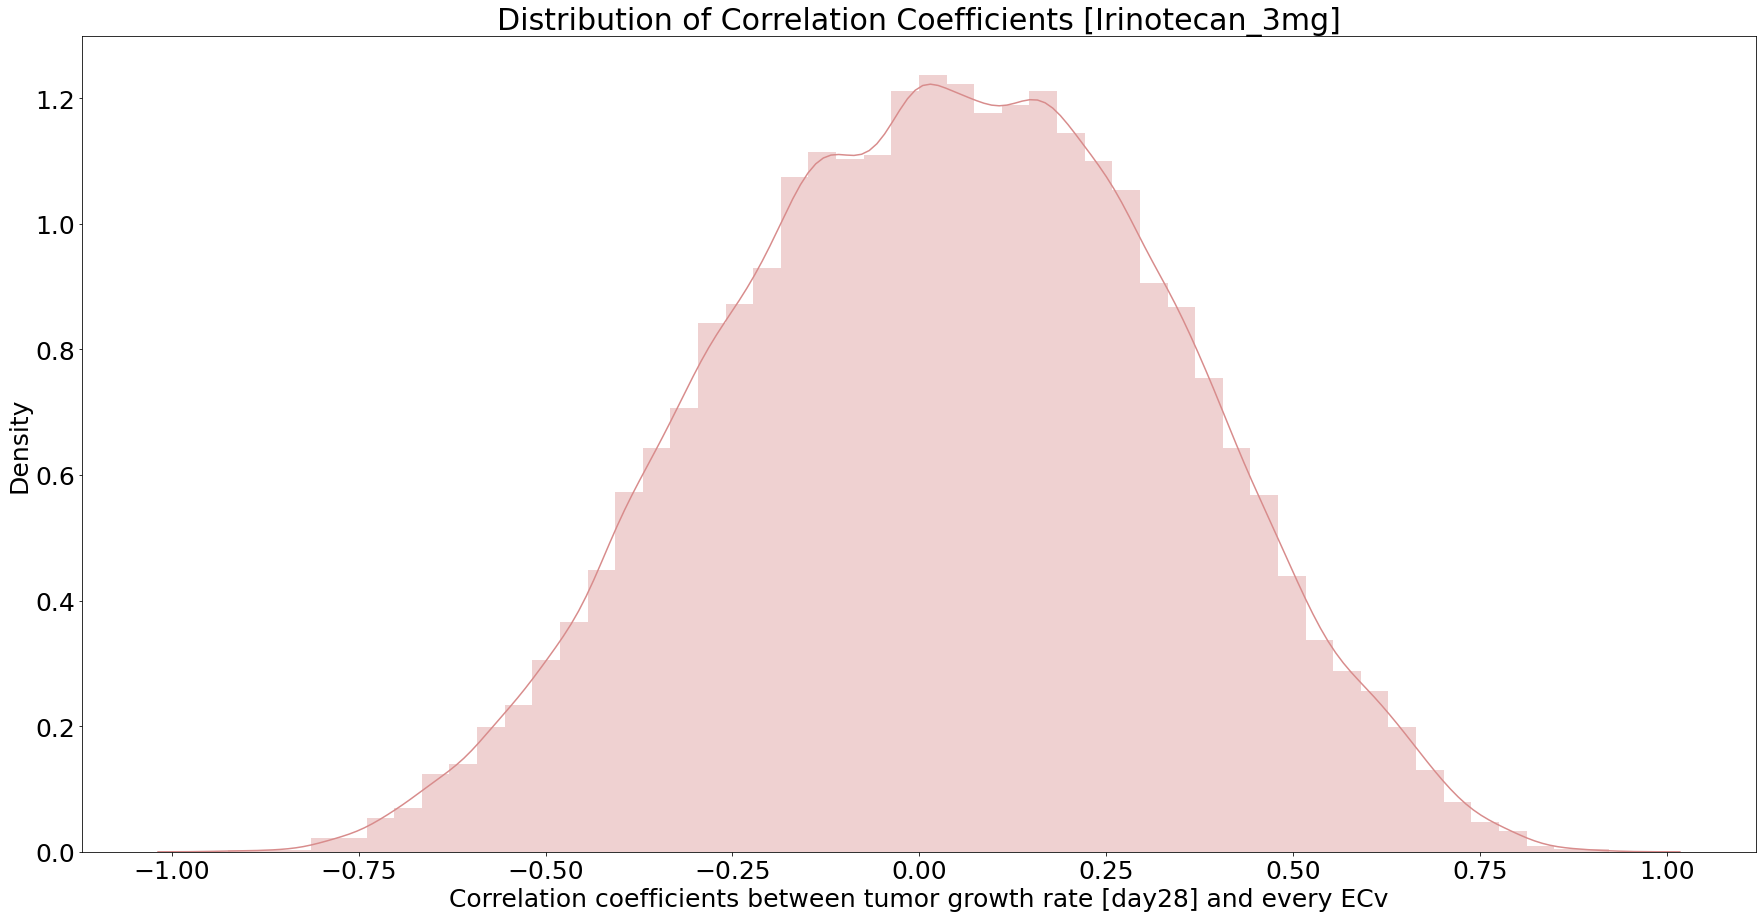

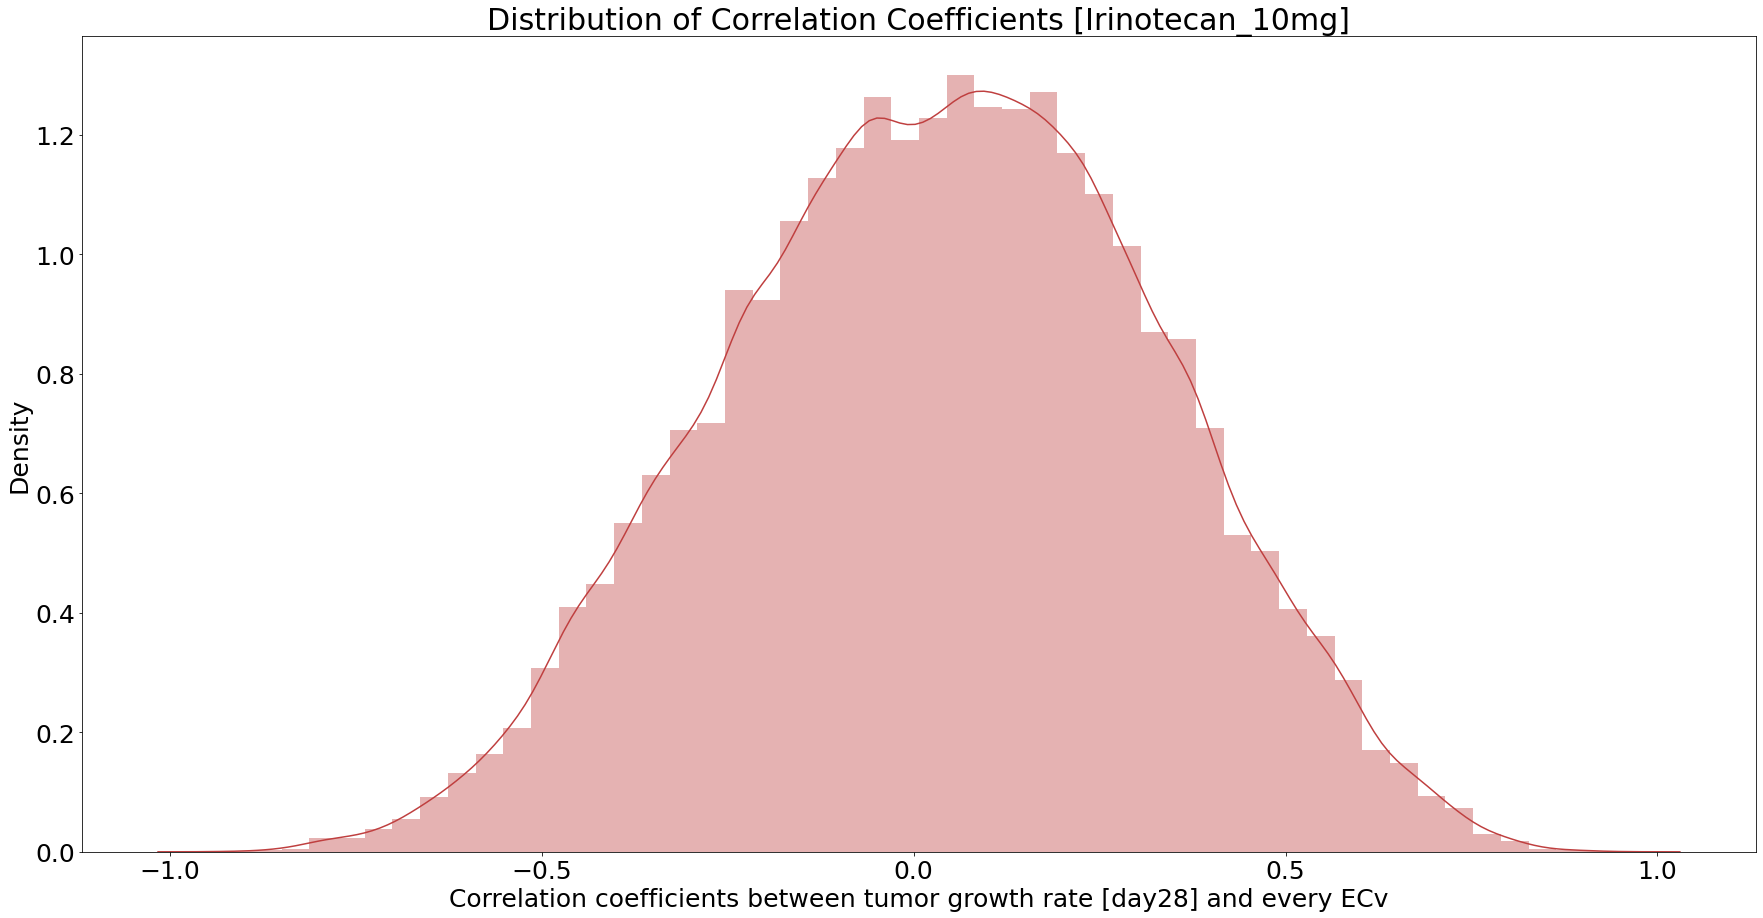

In [14]:
for l in range(len(list_corr)):
    # (Cetuximab, Oxaliplatin, Irinotecan) = (green, blue, red)
    colorlist = ["#999999", "#9BC99B", "#3FBF3F",
                    "#9BA7C9", "#3F5FBF", "#D88C8C", "#BF3F3F"]
    # plot
    plt.figure(figsize=(30, 15))
    plt.rcParams["font.family"] = 'sans-serif'
    plt.rcParams['font.size'] = 25
    plt.title(
        f'Distribution of Correlation Coefficients [{data_drug_name["drug_name"][l]}]', fontsize=30)
    plt.xlabel(
        'Correlation coefficients between tumor growth rate [day28] and every ECv', fontsize=25)
    plt.ylabel('Density', fontsize=25)
    sns.distplot(list_corr[l], color=colorlist[l])
    

In [15]:
# for d in data_drug_name
list_corr = []
for i in range(len(data_ecv)):
    # array tumor growth rate
    array_gr = np.array(list_gr_d28[2], dtype='float64').reshape(10,) # drug 0~6 → 1
    # array ecv
    array_ecv = np.array(data_ecv.iloc[i,2:], dtype='float64') # ecv 0~78858 → 1
    # corr
    corr = np.corrcoef(array_gr, array_ecv)[0,1]
    # append
    list_corr.append(corr)

<AxesSubplot:title={'center':'Distribution of Correlation Coefficients [Cetuximab_20mg]'}, xlabel='Correlation coefficients between tumor growth rate [day28] and every ECv', ylabel='Density'>

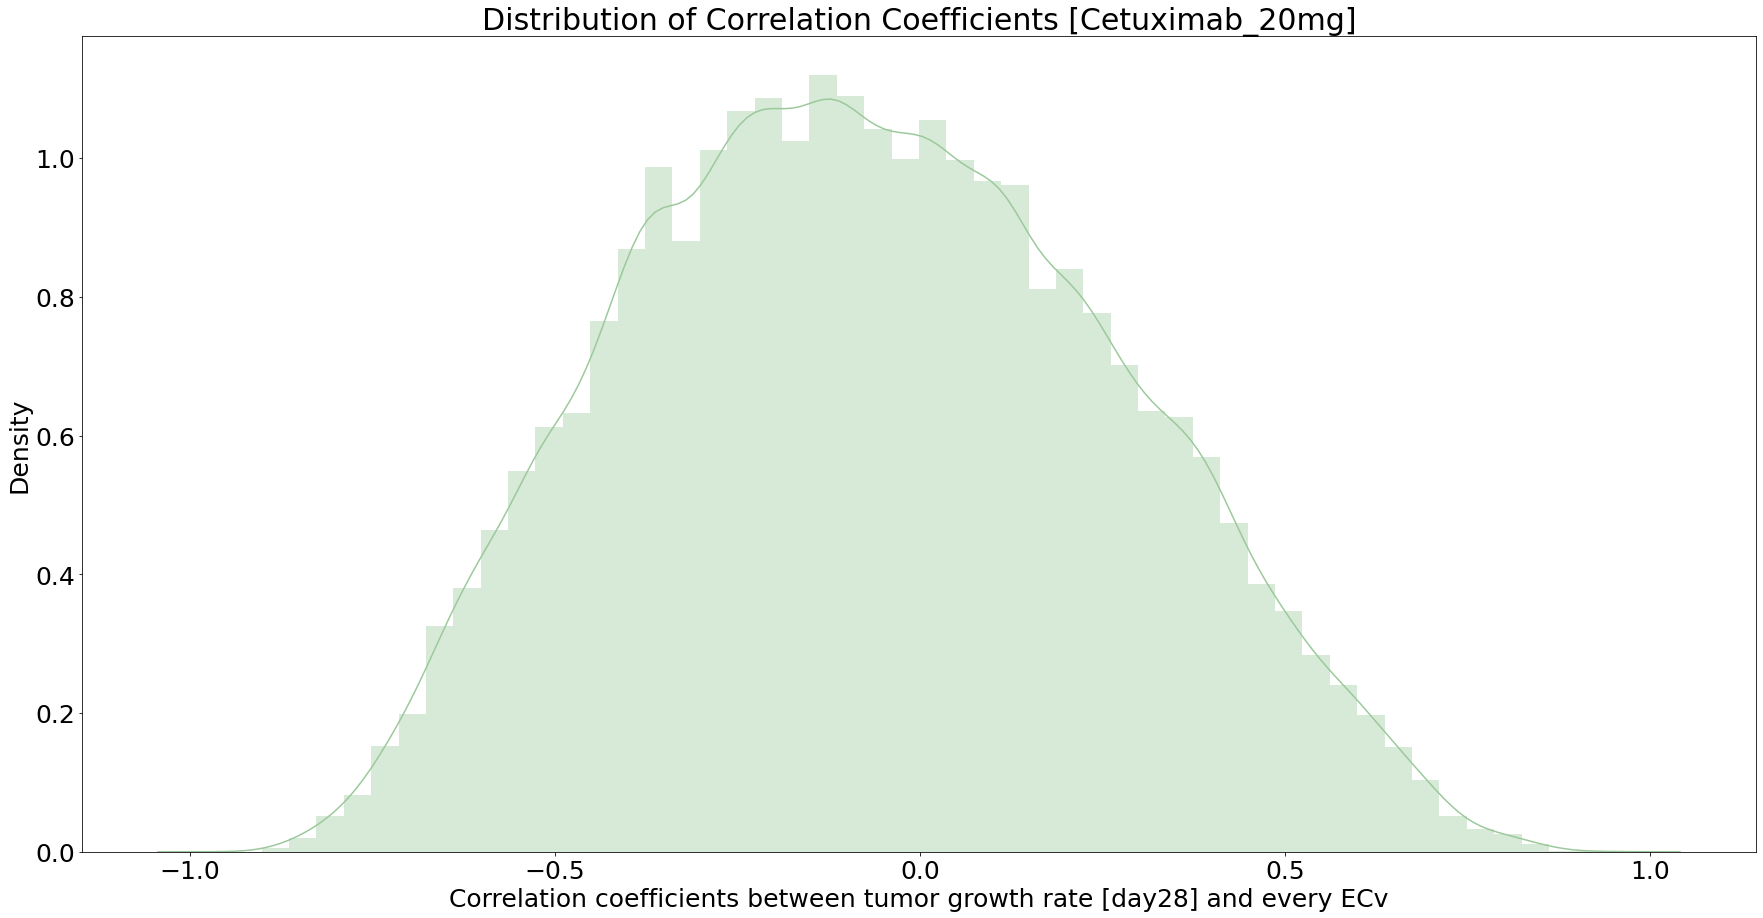

In [18]:
plt.figure(figsize=(30, 15))
plt.rcParams["font.family"] = 'sans-serif'
plt.rcParams['font.size'] = 25
plt.title(f'Distribution of Correlation Coefficients [{data_drug_name["drug_name"][1]}]', fontsize=30)
plt.xlabel('Correlation coefficients between tumor growth rate [day28] and every ECv', fontsize=25)
plt.ylabel('Density', fontsize=25)
sns.distplot(list_corr, color='#9BC99B')

In [12]:
# for d in data_drug_name
list_corr2 = []
for i in range(len(data_ecv)):
    # array tumor growth rate
    array_gr = np.array(list_gr_d28[4], dtype='float64').reshape(10,) # drug 0~6 → 1
    # array ecv
    array_ecv = np.array(data_ecv.iloc[i,2:], dtype='float64') # ecv 0~78858 → 1
    # corr
    corr = np.corrcoef(array_gr, array_ecv)[0,1]
    # append
    list_corr2.append(corr)

<AxesSubplot:ylabel='Density'>

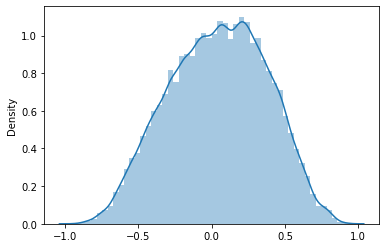

In [14]:
sns.distplot(list_corr2)

In [13]:
# for d in data_drug_name
list_corr3 = []
for i in range(len(data_ecv)):
    # array tumor growth rate
    array_gr = np.array(list_gr_d28[6], dtype='float64').reshape(10,) # drug 0~6 → 1
    # array ecv
    array_ecv = np.array(data_ecv.iloc[i,2:], dtype='float64') # ecv 0~78858 → 1
    # corr
    corr = np.corrcoef(array_gr, array_ecv)[0,1]
    # append
    list_corr3.append(corr)

<AxesSubplot:ylabel='Density'>

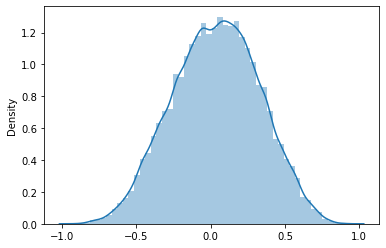

In [15]:
sns.distplot(list_corr3)

# 上位の抽出

In [35]:
ecv_index = list(list_corr[0]).index(max(list_corr[0]))
ecv_index

17030

In [37]:
data_ecv.iloc[ecv_index, :2][0]

'NAGS'

In [38]:
data_ecv.iloc[ecv_index, :2][1]

'DHDH'

drug = Control, index = 17030, parent = NAGS, child = DHDH
[SAVE]: ./result/z_fig/IDEA1_2/fig_scatterplot_Control.png
drug = Cetuximab_20mg, index = 45797, parent = SGK223, child = PPP2R2A
[SAVE]: ./result/z_fig/IDEA1_2/fig_scatterplot_Cetuximab_20mg.png
drug = Cetuximab_60mg, index = 38705, parent = CCDC125, child = MYADM
[SAVE]: ./result/z_fig/IDEA1_2/fig_scatterplot_Cetuximab_60mg.png
drug = Oxaliplatin_3mg, index = 17736, parent = MYH9, child = DOCK1
[SAVE]: ./result/z_fig/IDEA1_2/fig_scatterplot_Oxaliplatin_3mg.png
drug = Oxaliplatin_10mg, index = 20843, parent = ALG12, child = ERLIN1
[SAVE]: ./result/z_fig/IDEA1_2/fig_scatterplot_Oxaliplatin_10mg.png
drug = Irinotecan_3mg, index = 23540, parent = ASAH2, child = FOS
[SAVE]: ./result/z_fig/IDEA1_2/fig_scatterplot_Irinotecan_3mg.png
drug = Irinotecan_10mg, index = 30668, parent = CTBS, child = KIAA1530
[SAVE]: ./result/z_fig/IDEA1_2/fig_scatterplot_Irinotecan_10mg.png


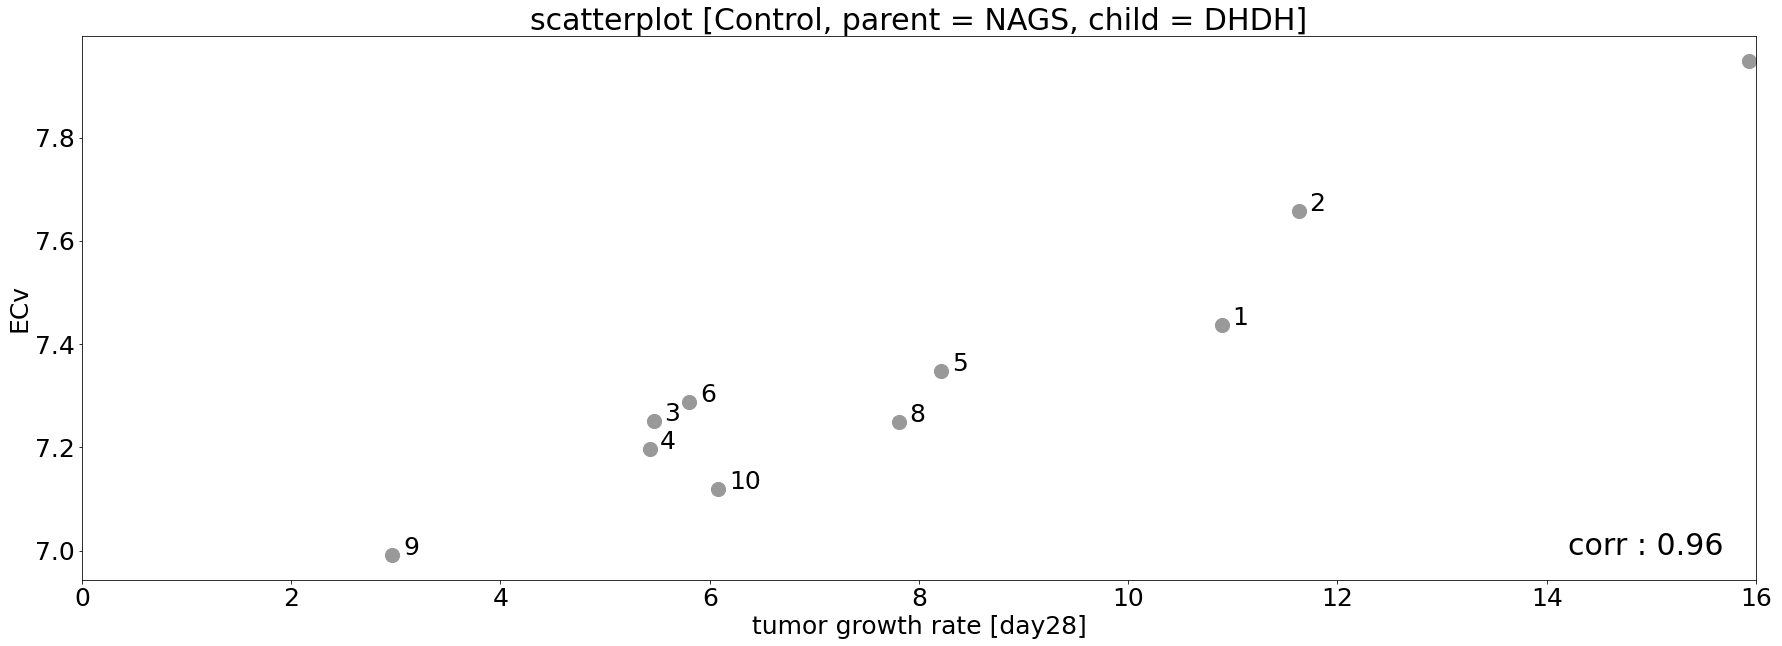

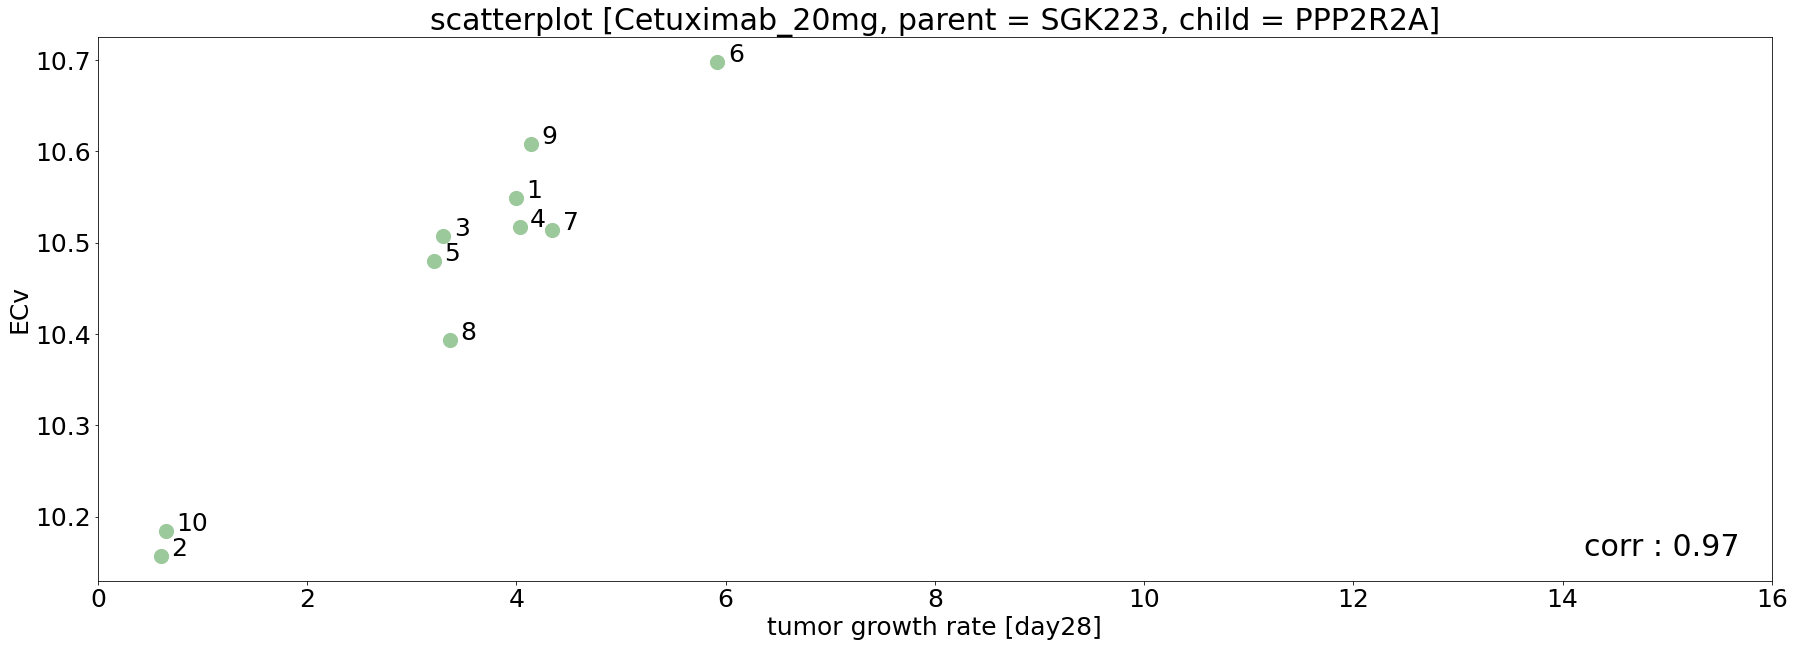

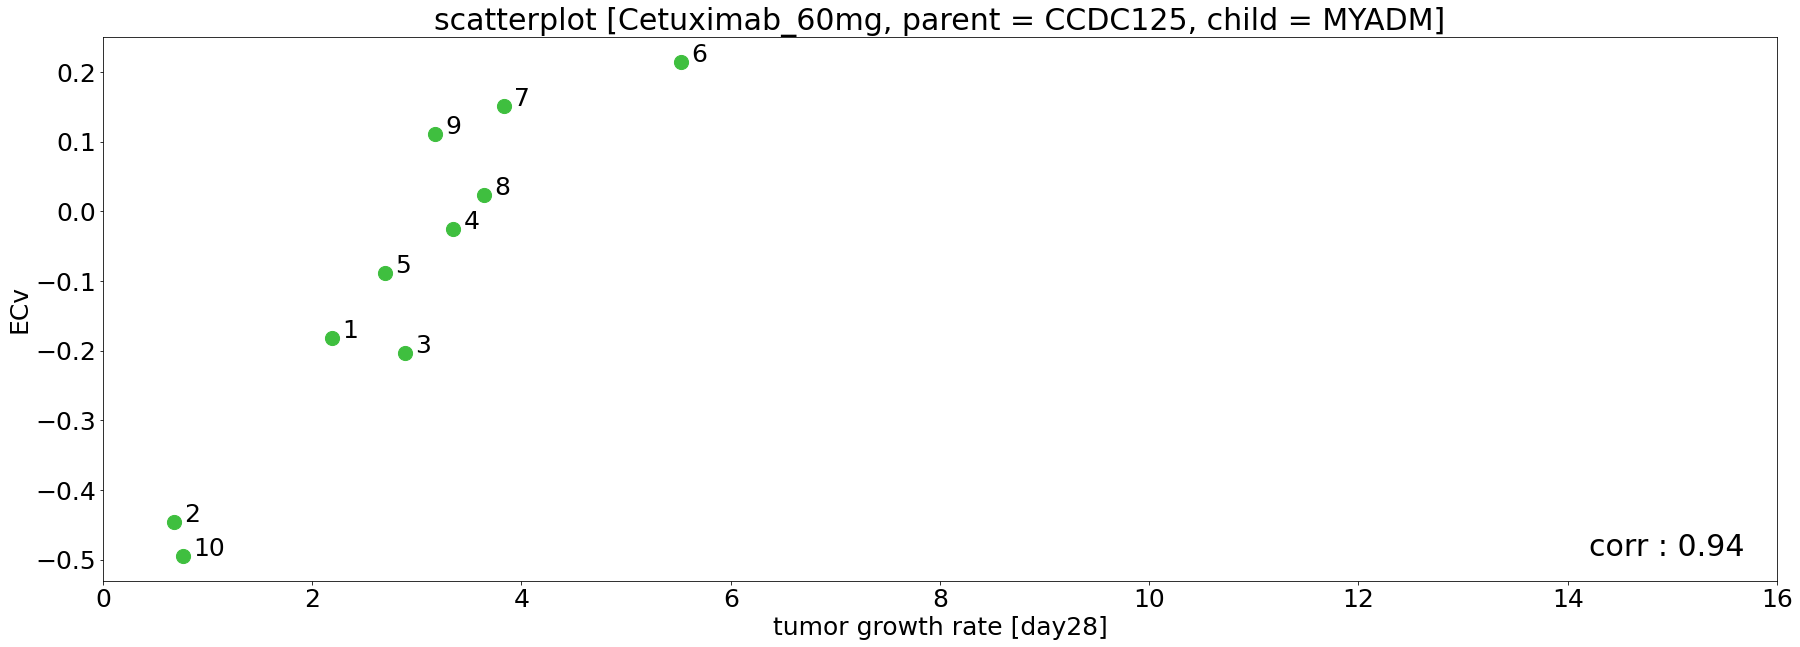

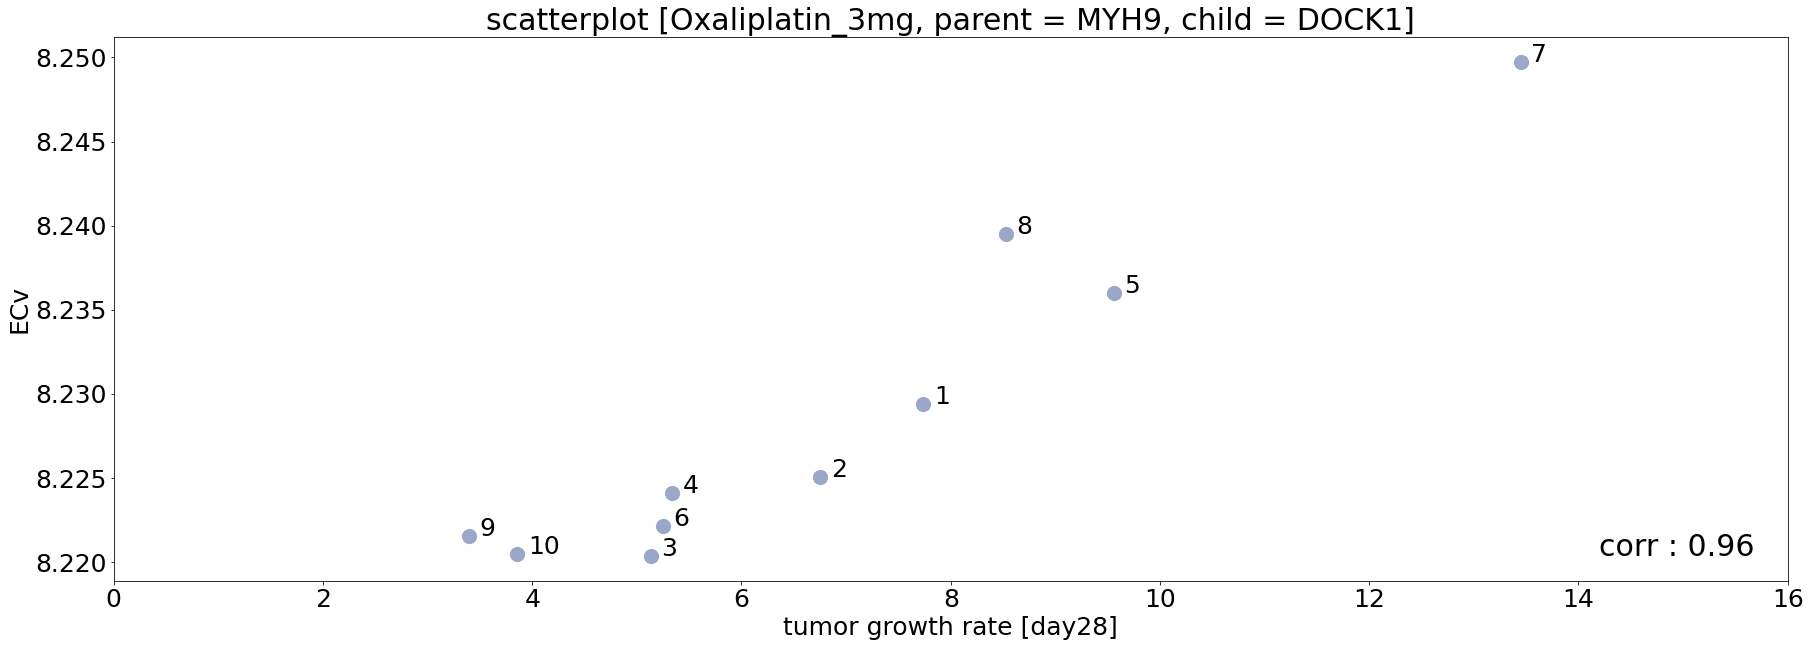

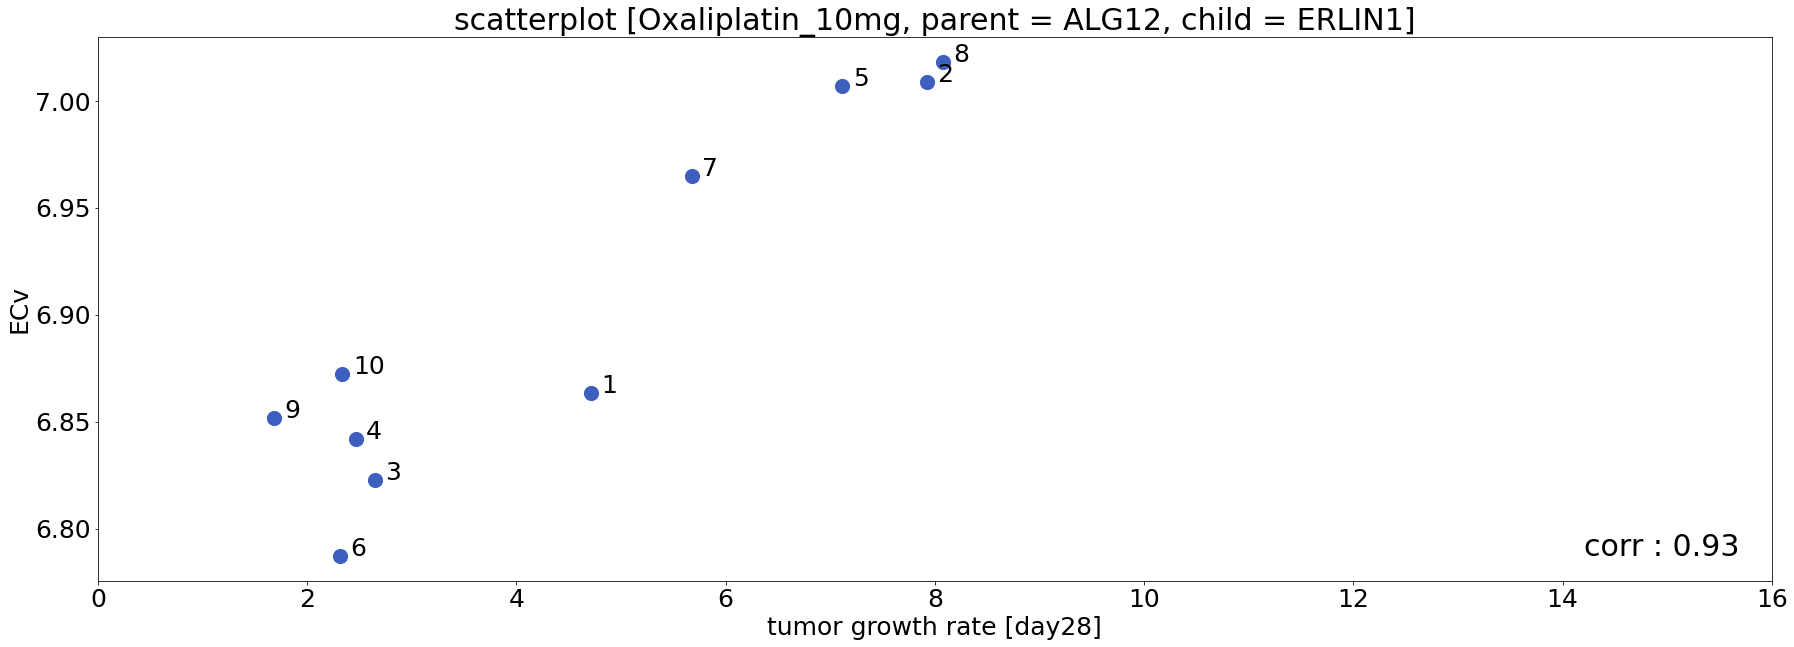

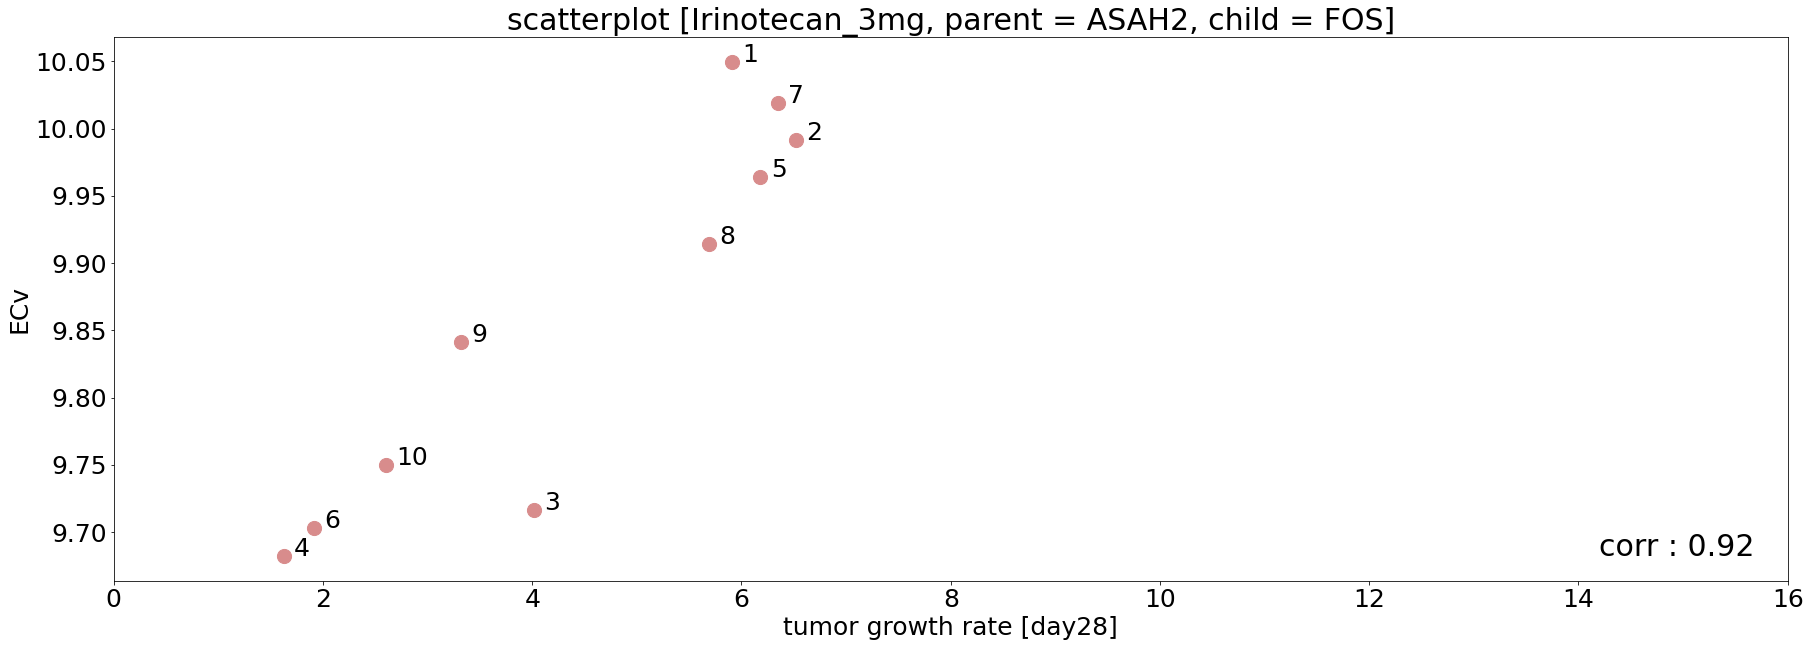

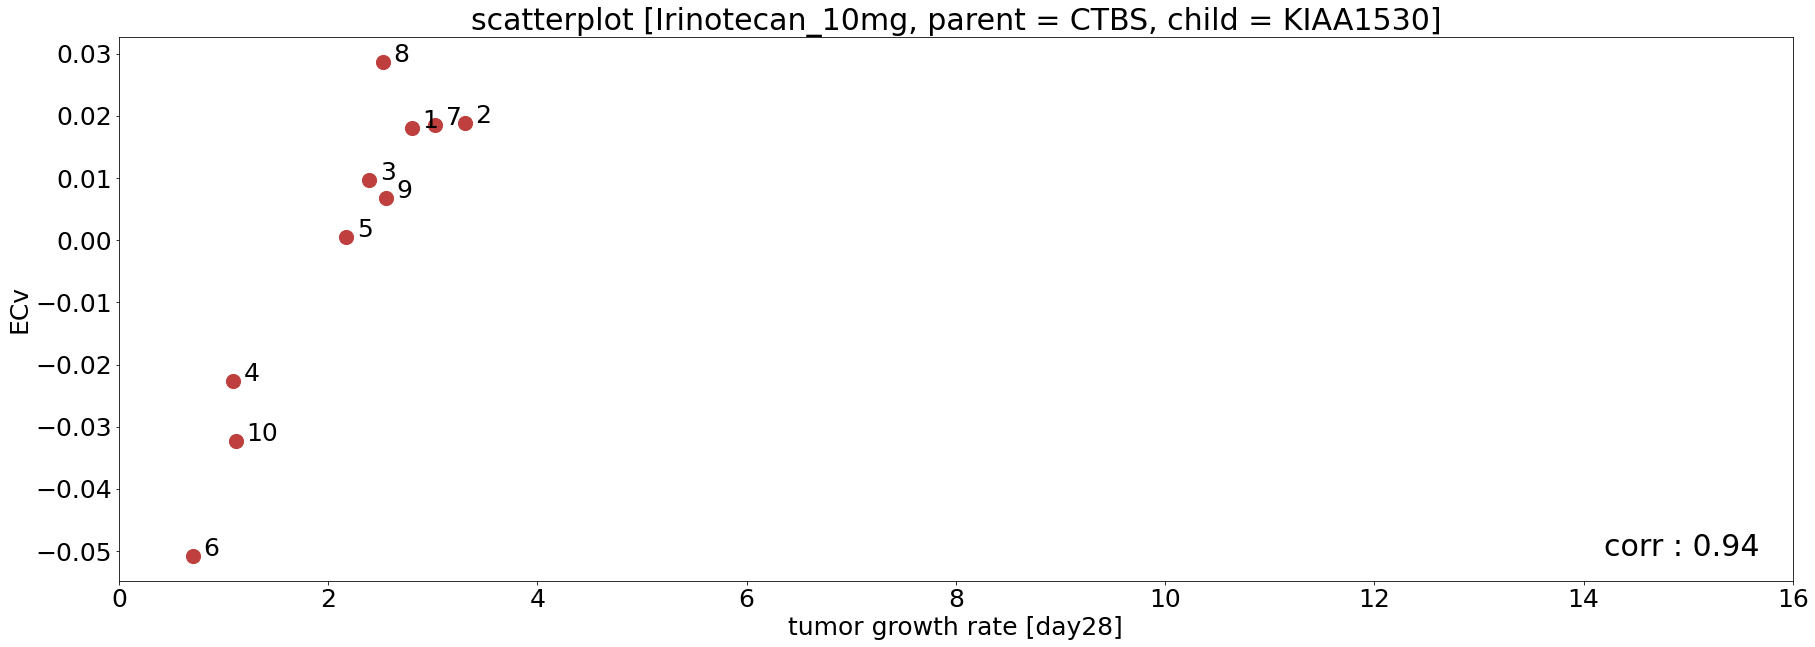

In [41]:
def scatterplot_maxcorrpair(data_drug_name, list_corr, data_ecv, list_gr_d28):
    for d in range(len(data_drug_name['drug_name'])):
        # information
        ecv_index = list(list_corr[d]).index(max(list_corr[d]))
        drug = data_drug_name["drug_name"][d]
        parent = data_ecv.iloc[ecv_index, :2][0]
        child = data_ecv.iloc[ecv_index, :2][1]
        print(f'drug = {drug}, index = {ecv_index}, parent = {parent}, child = {child}')

        # array tumor growth rate & ecv
        array_gr = np.array(list_gr_d28[d], dtype='float64').reshape(10,)
        array_ecv = np.array(data_ecv.iloc[ecv_index, 2:], dtype='float64')
        # corr
        corr = np.corrcoef(array_gr, array_ecv)[0, 1]

        # scatter plot
        plt.figure(figsize=(30, 10))
        plt.rcParams["font.family"] = 'sans-serif'
        plt.rcParams['font.size'] = 25
        plt.title(f'scatterplot [{drug}, parent = {parent}, child = {child}]', fontsize=30)
        plt.xlim([0, 16])
        #plt.ylim([0,16])
        plt.xlabel('tumor growth rate [day28]', fontsize=25)
        plt.ylabel('ECv', fontsize=25)
        plt.text(14.2, min(array_ecv), f"corr : {round(max(list_corr[d]), 2)}", size=30)

        data_name = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
        # (Cetuximab, Oxaliplatin, Irinotecan) = (green, blue, red)
        colorlist = ["#999999", "#9BC99B", "#3FBF3F", "#9BA7C9", "#3F5FBF", "#D88C8C", "#BF3F3F"]

        for (x, y, k) in zip(array_gr, array_ecv, data_name):
            plt.scatter(x, y, color=colorlist[d], s=200)
            plt.annotate(k, xy=(x+0.1, y), size=25)

        # save
        savepath = f'./result/z_fig/IDEA1_2/fig_scatterplot_{data_drug_name["drug_name"][d]}.png'
        plt.savefig(savepath, dpi=300, format='png', bbox_inches="tight")
        print(f'[SAVE]: {savepath}')
    return

scatterplot_maxcorrpair(data_drug_name, list_corr, data_ecv, list_gr_d28)

In [ ]:
def scatterplot_maxcorrpair()

In [23]:
print(max(list_corr))
print(list_corr.index(max(list_corr)))

0.9365784609281049
38705


In [66]:
ecv_index = list_corr.index(max(list_corr))
ecv_index

38705

In [68]:
data_ecv.iloc[ecv_index, :2][0]


'CCDC125'

drug = Cetuximab_60mg, index = 38705, parent = CCDC125, child = MYADM
[SAVE]: ./result/z_fig/IDEA1_2/fig_scatterplot_Control.png
drug = Cetuximab_60mg, index = 38705, parent = CCDC125, child = MYADM
[SAVE]: ./result/z_fig/IDEA1_2/fig_scatterplot_Cetuximab_20mg.png
drug = Cetuximab_60mg, index = 38705, parent = CCDC125, child = MYADM
[SAVE]: ./result/z_fig/IDEA1_2/fig_scatterplot_Cetuximab_60mg.png
drug = Cetuximab_60mg, index = 38705, parent = CCDC125, child = MYADM
[SAVE]: ./result/z_fig/IDEA1_2/fig_scatterplot_Oxaliplatin_3mg.png
drug = Cetuximab_60mg, index = 38705, parent = CCDC125, child = MYADM
[SAVE]: ./result/z_fig/IDEA1_2/fig_scatterplot_Oxaliplatin_10mg.png
drug = Cetuximab_60mg, index = 38705, parent = CCDC125, child = MYADM
[SAVE]: ./result/z_fig/IDEA1_2/fig_scatterplot_Irinotecan_3mg.png
drug = Cetuximab_60mg, index = 38705, parent = CCDC125, child = MYADM
[SAVE]: ./result/z_fig/IDEA1_2/fig_scatterplot_Irinotecan_10mg.png


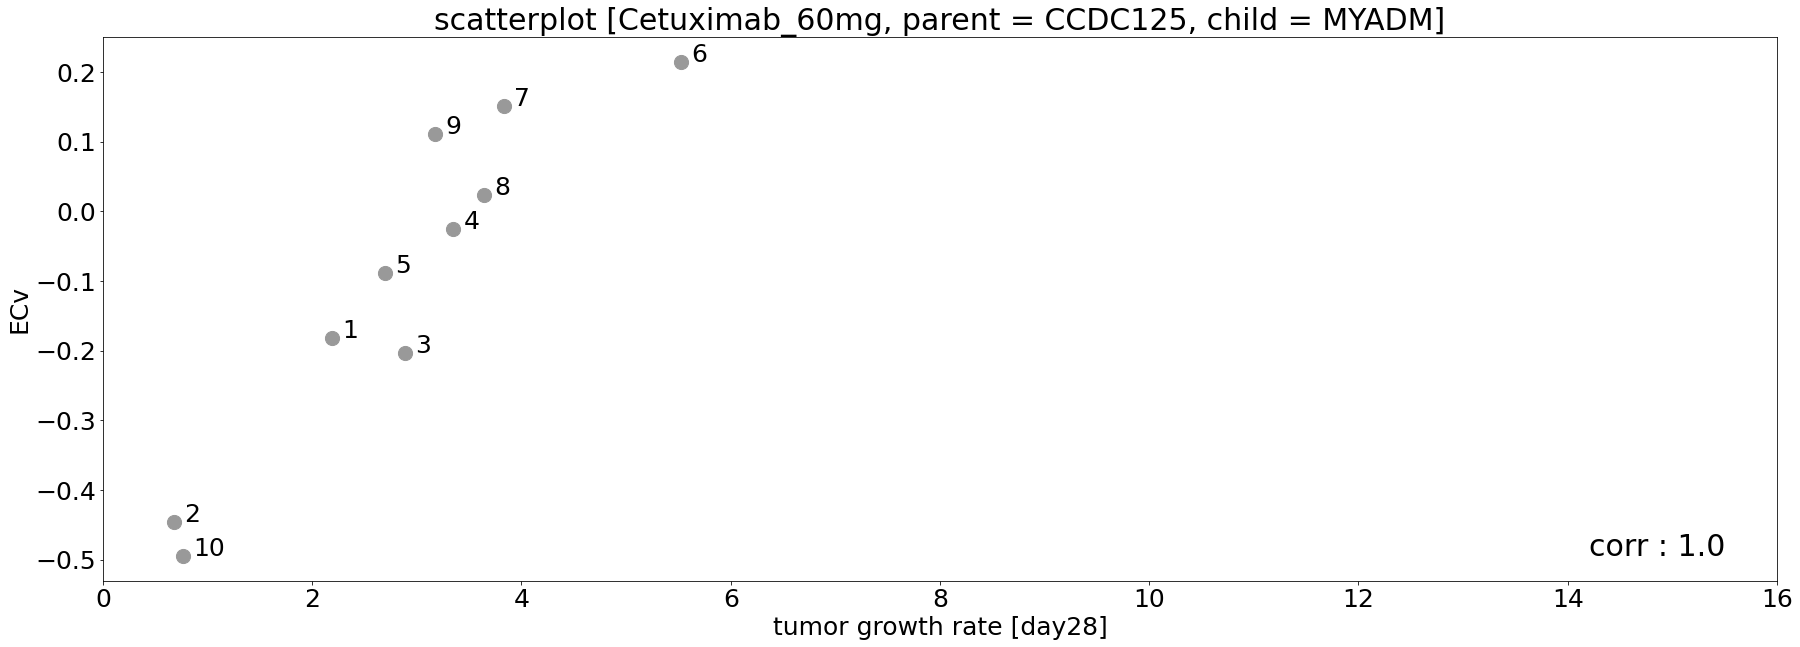

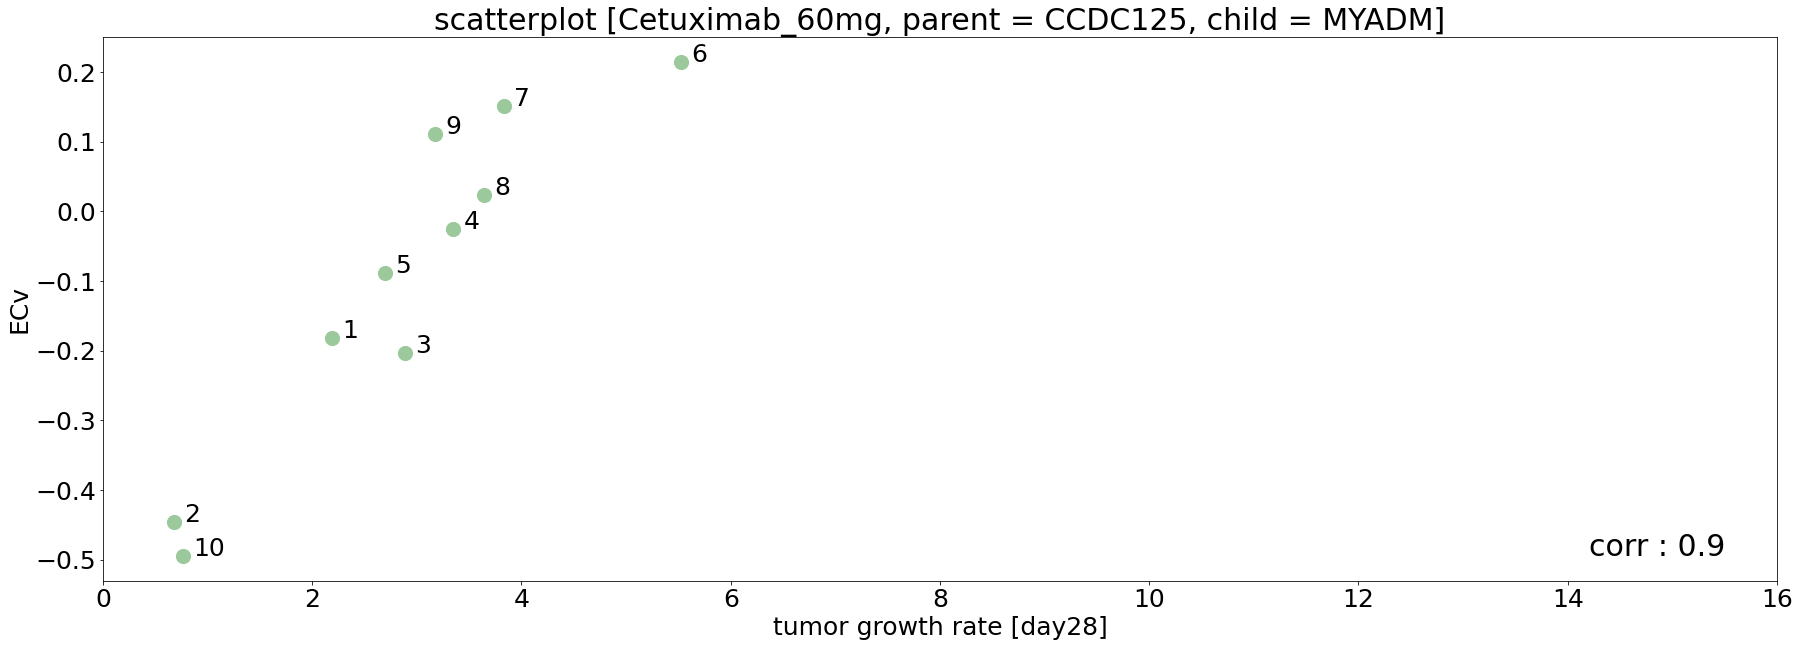

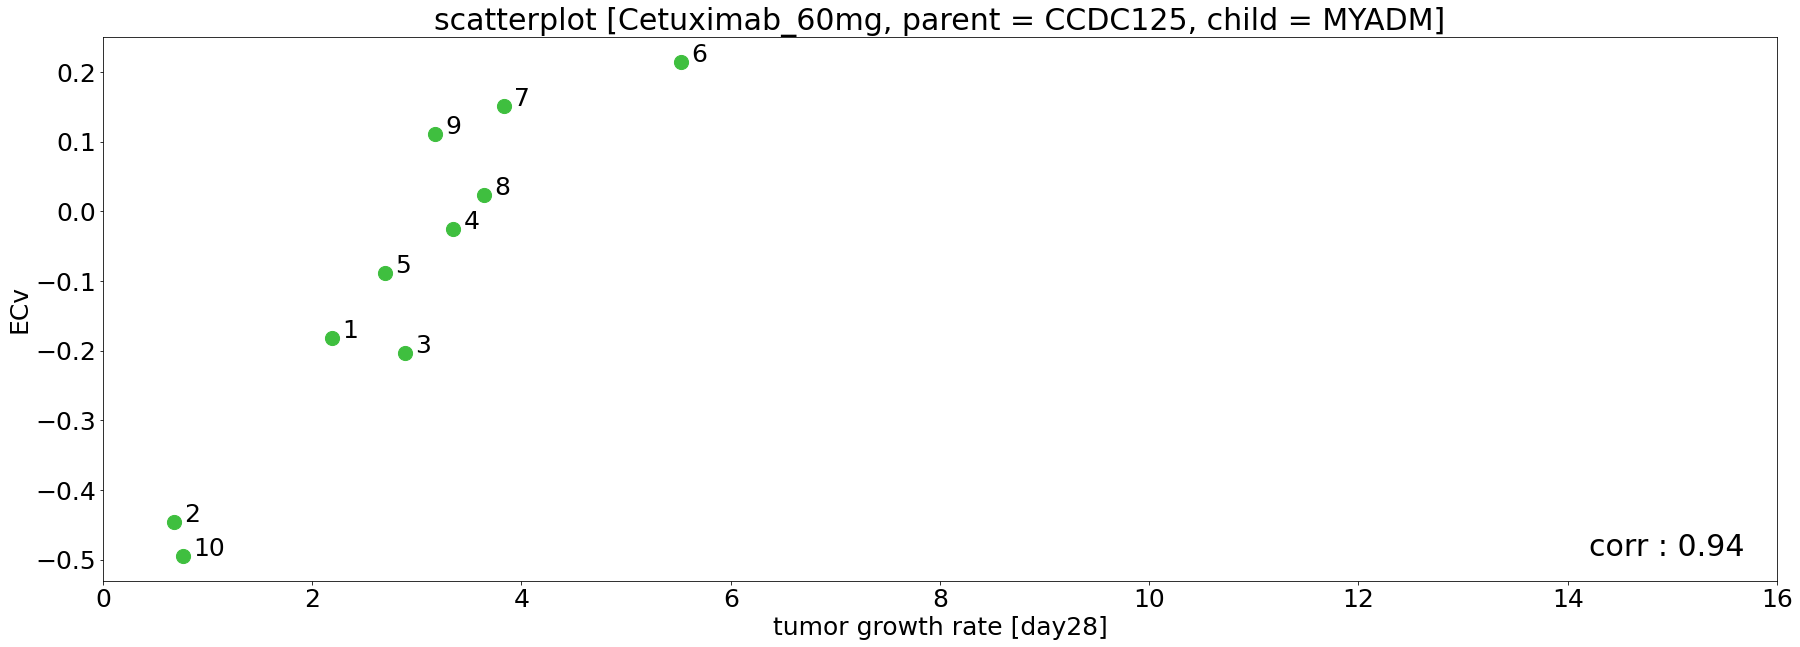

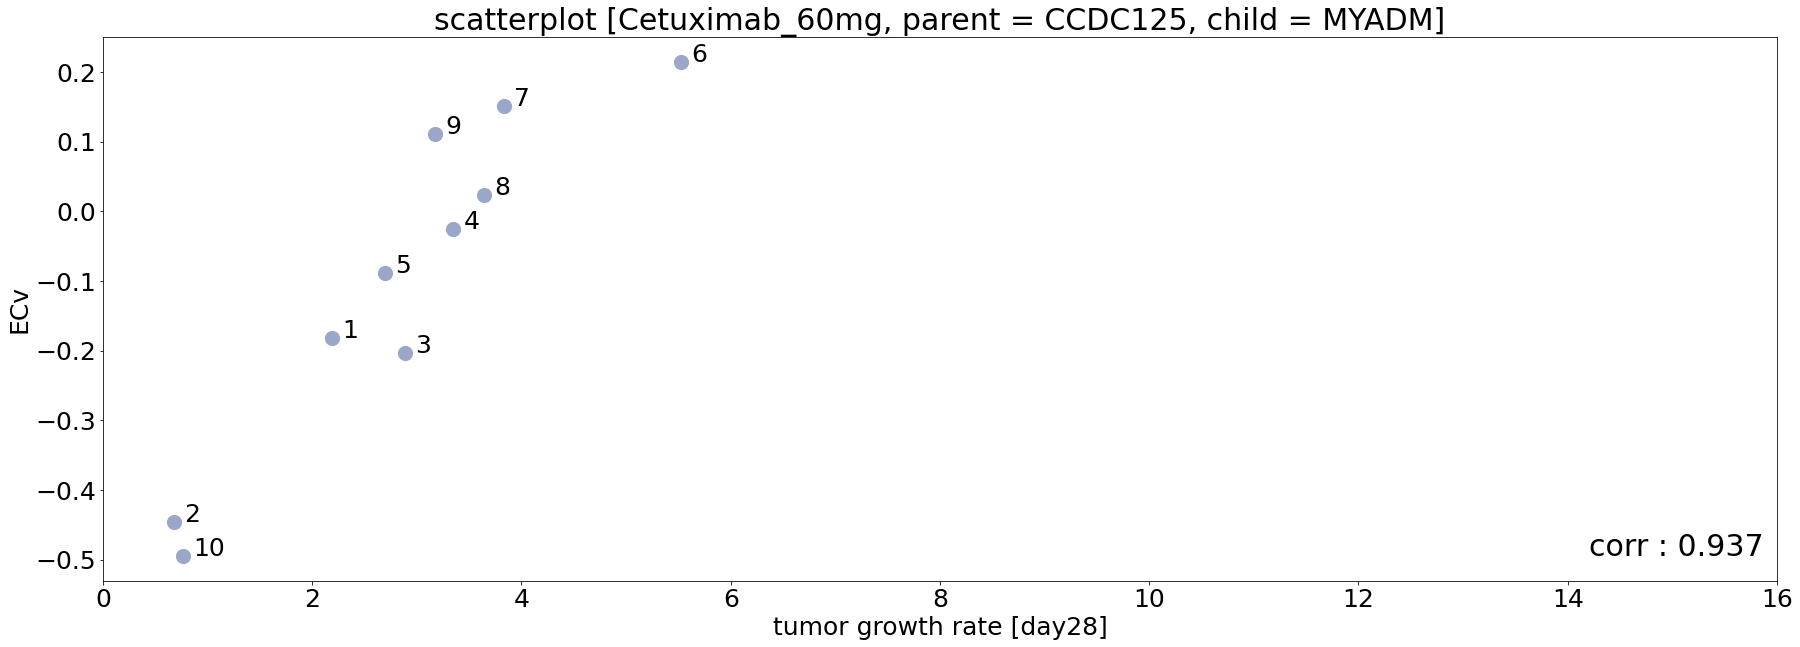

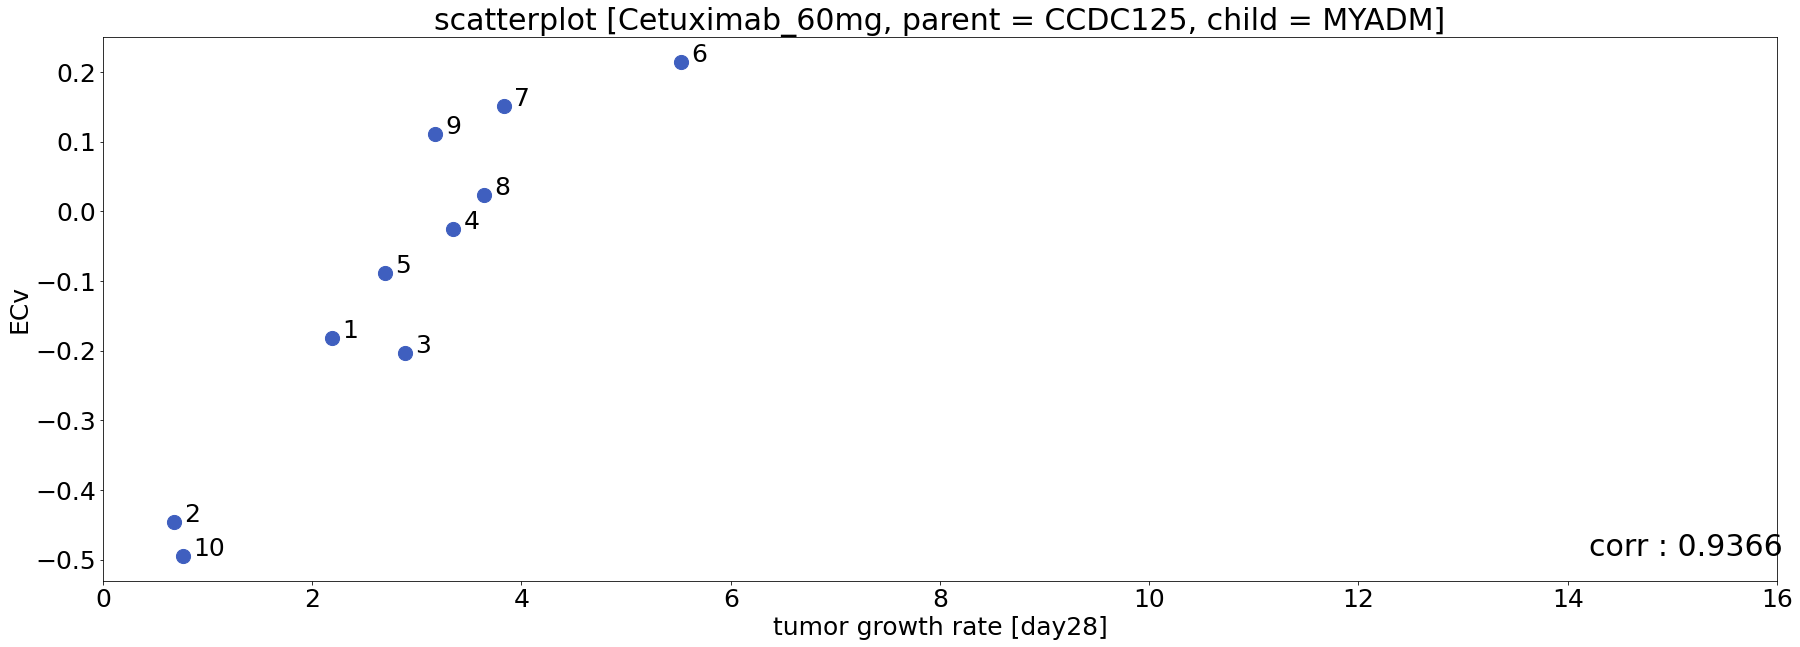

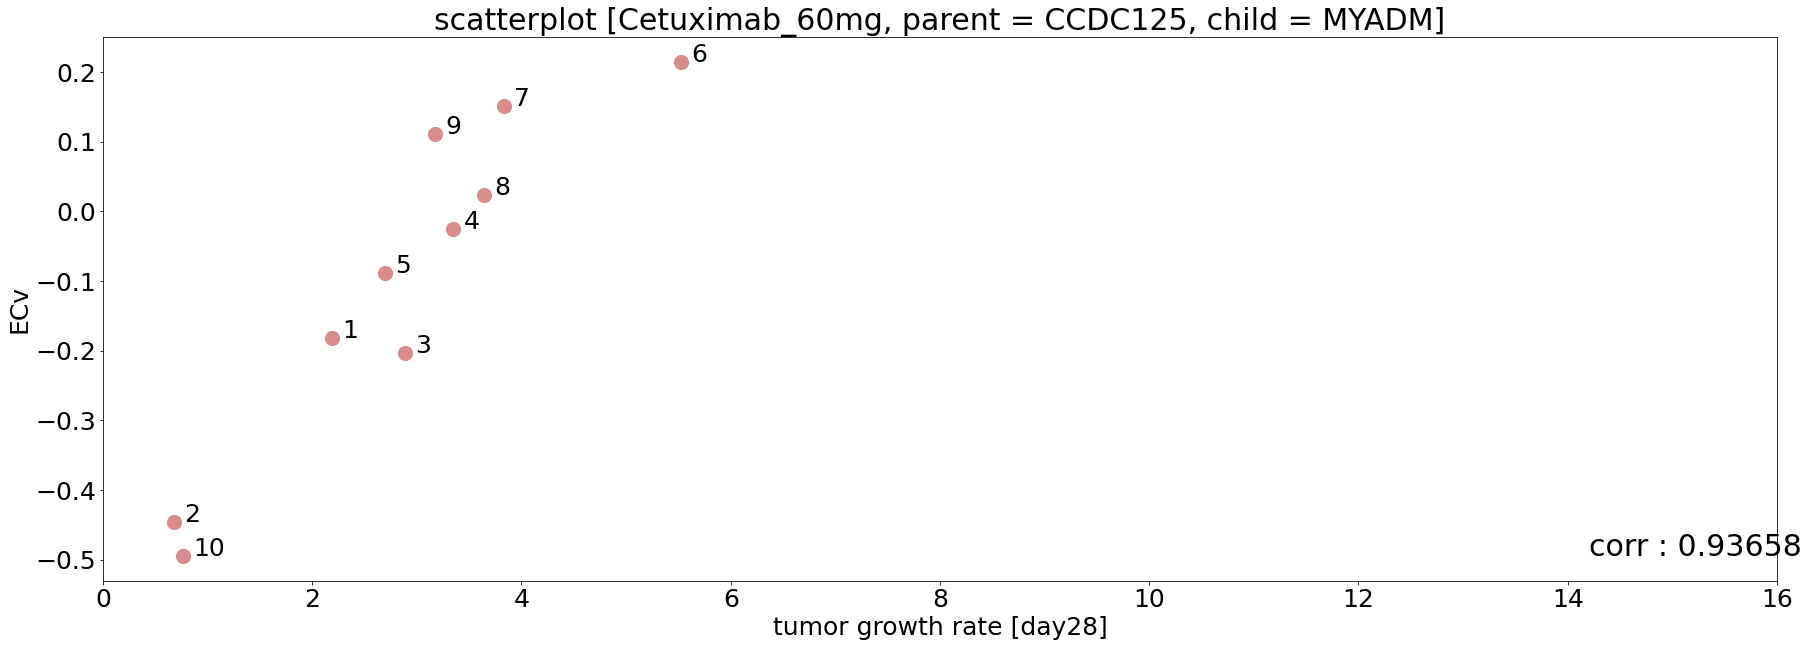

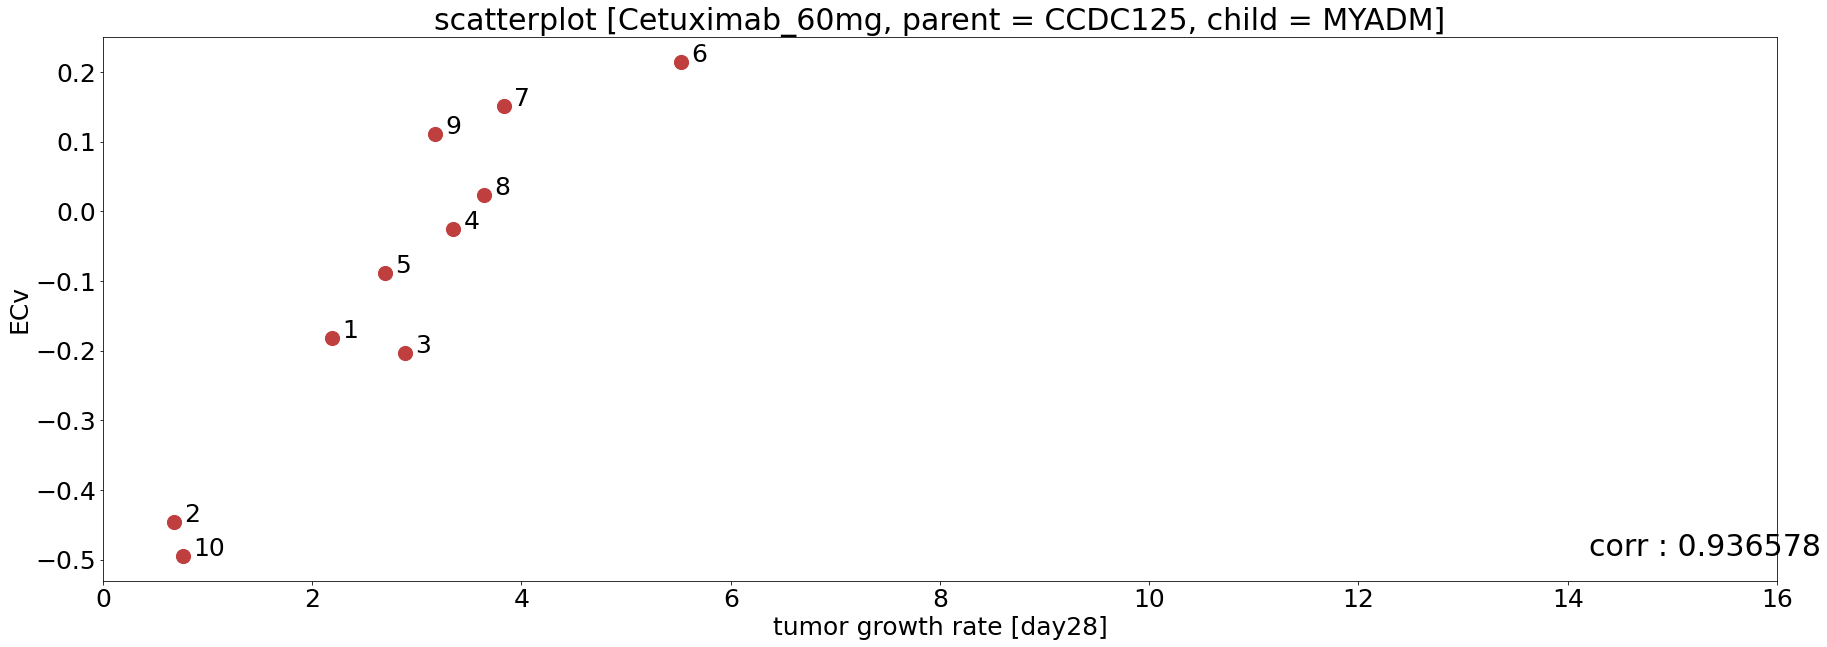

In [72]:
def scatterplot_maxcorrpair(data_drug_name, list_corr, data_ecv, list_gr_d28):
    for d in range(len(data_drug_name['drug_name'])):
        # information
        ecv_index = list_corr.index(max(list_corr))
        drug = data_drug_name["drug_name"][2] #d
        parent = data_ecv.iloc[ecv_index, :2][0] #d
        child = data_ecv.iloc[ecv_index, :2][1] #d
        print(f'drug = {drug}, index = {ecv_index}, parent = {parent}, child = {child}')

        # array tumor growth rate & ecv
        array_gr = np.array(list_gr_d28[2], dtype='float64').reshape(10,)#d
        array_ecv = np.array(data_ecv.iloc[ecv_index, 2:], dtype='float64')#d
        # corr
        corr = np.corrcoef(array_gr, array_ecv)[0, 1]

        # scatter plot
        plt.figure(figsize=(30, 10))
        plt.rcParams["font.family"] = 'sans-serif'
        plt.rcParams['font.size'] = 25
        plt.title(f'scatterplot [{drug}, parent = {parent}, child = {child}]', fontsize=30)
        plt.xlim([0, 16])
        #plt.ylim([0,16])
        plt.xlabel('tumor growth rate [day28]', fontsize=25)
        plt.ylabel('ECv', fontsize=25)
        plt.text(14.2, min(array_ecv), f"corr : {round(max(list_corr), d)}", size=30)

        data_name = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
        # (Cetuximab, Oxaliplatin, Irinotecan) = (green, blue, red)
        colorlist = ["#999999", "#9BC99B", "#3FBF3F", "#9BA7C9", "#3F5FBF", "#D88C8C", "#BF3F3F"]

        for (x, y, k) in zip(array_gr, array_ecv, data_name):
            plt.scatter(x, y, color=colorlist[d], s=200)
            plt.annotate(k, xy=(x+0.1, y), size=25)

        # save
        savepath = f'./result/z_fig/IDEA1_2/fig_scatterplot_{data_drug_name["drug_name"][d]}.png'
        plt.savefig(savepath, dpi=300, format='png', bbox_inches="tight")
        print(f'[SAVE]: {savepath}')

scatterplot_maxcorrpair(data_drug_name, list_corr, data_ecv, list_gr_d28)

In [64]:
def scatterplot_maxcorrpair(data_drug_name, list_corr, data_ecv, list_gr_d28):
    for d in range(len(data_drug_name['drug_name'])):
        # information
        ecv_index = list_corr.index(max(list_corr))
        drug = data_drug_name["drug_name"][d]
        parent = data_ecv.iloc[ecv_index, :d][0]
        child = data_ecv.iloc[ecv_index, :d][1]
        print(f'drug = {drug}, index = {ecv_index}, parent = {parent}, child = {child}')

        # array tumor growth rate & ecv
        array_gr = np.array(list_gr_d28[d], dtype='float64').reshape(10,)
        array_ecv = np.array(data_ecv.iloc[ecv_index, d:], dtype='float64')
        # corr
        corr = np.corrcoef(array_gr, array_ecv)[0, 1]

        # scatter plot
        plt.figure(figsize=(30, 10))
        plt.rcParams["font.family"] = 'sans-serif'
        plt.rcParams['font.size'] = 25
        plt.title(f'scatterplot [{drug}, parent = {parent}, child = {child}]', fontsize=30)
        plt.xlim([0, 16])
        #plt.ylim([0,16])
        plt.xlabel('tumor growth rate [day28]', fontsize=25)
        plt.ylabel('ECv', fontsize=25)
        plt.text(14.2, min(array_ecv), f"corr : {round(max(list_corr), d)}", size=30)

        data_name = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
        for (x, y, k) in zip(array_gr, array_ecv, data_name):
            plt.scatter(x, y, color='red', s=200)
            plt.annotate(k, xy=(x+0.1, y), size=25)

        # save
        savepath = f'./result/z_fig/IDEA1_2/fig_scatterplot_{data_drug_name["drug_name"][d]}.png'
        plt.savefig(savepath, dpi=300, format='png', bbox_inches="tight")
        print(f'[SAVE]: {savepath}')

scatterplot_maxcorrpair(data_drug_name, list_corr, data_ecv, list_gr_d28)

IndexError: index 0 is out of bounds for axis 0 with size 0

In [58]:
for d in range(len(data_drug_name['drug_name'])):
    # information
    ecv_index = list_corr.index(max(list_corr))
    drug = data_drug_name["drug_name"][d]
    parent = data_ecv.iloc[ecv_index,:d][0]
    child = data_ecv.iloc[ecv_index,:d][1]

    print(np.array(data_ecv.iloc[ecv_index,:d]))
    # array tumor growth rate & ecv
    array_gr = np.array(list_gr_d28[d], dtype='float64').reshape(10,) # drug 0~6 → 1
    array_ecv = np.array(data_ecv.iloc[ecv_index,d:], dtype='float64') # ecv 0~78858 → 1
    # corr
    corr = np.corrcoef(array_gr, array_ecv)[0,1]

    # scatter plot
    plt.figure(figsize=(30, 10))
    plt.rcParams["font.family"] = 'sans-serif'
    plt.rcParams['font.size'] = 25
    plt.title(f'scatterplot [{drug}, parent = {parent}, child = {child}]', fontsize=30)
    plt.xlim([0,16])
    #plt.ylim([0,16])
    plt.xlabel('tumor growth rate [day28]', fontsize=25)
    plt.ylabel('ECv', fontsize=25)
    plt.text(14.2,min(array_ecv), f"corr : {round(max(list_corr), d)}", size=30)

    data_name = [1,2,3,4,5,6,7,8,9,10]
    for (x,y,k) in zip(array_gr,array_ecv,data_name):
            plt.scatter(x, y, color='red', s=200)
            plt.annotate(k, xy=(x+0.1, y),size=25)

    # save
    savepath = f'./result/z_fig/IDEA1_2/fig_scatterplot_{data_drug_name["drug_name"][d]}.png'
    plt.savefig(savepath, dpi=300, format='png', bbox_inches="tight")
    print(f'[SAVE]: {savepath}')

IndexError: index 0 is out of bounds for axis 0 with size 0

['CCDC125' 'MYADM']


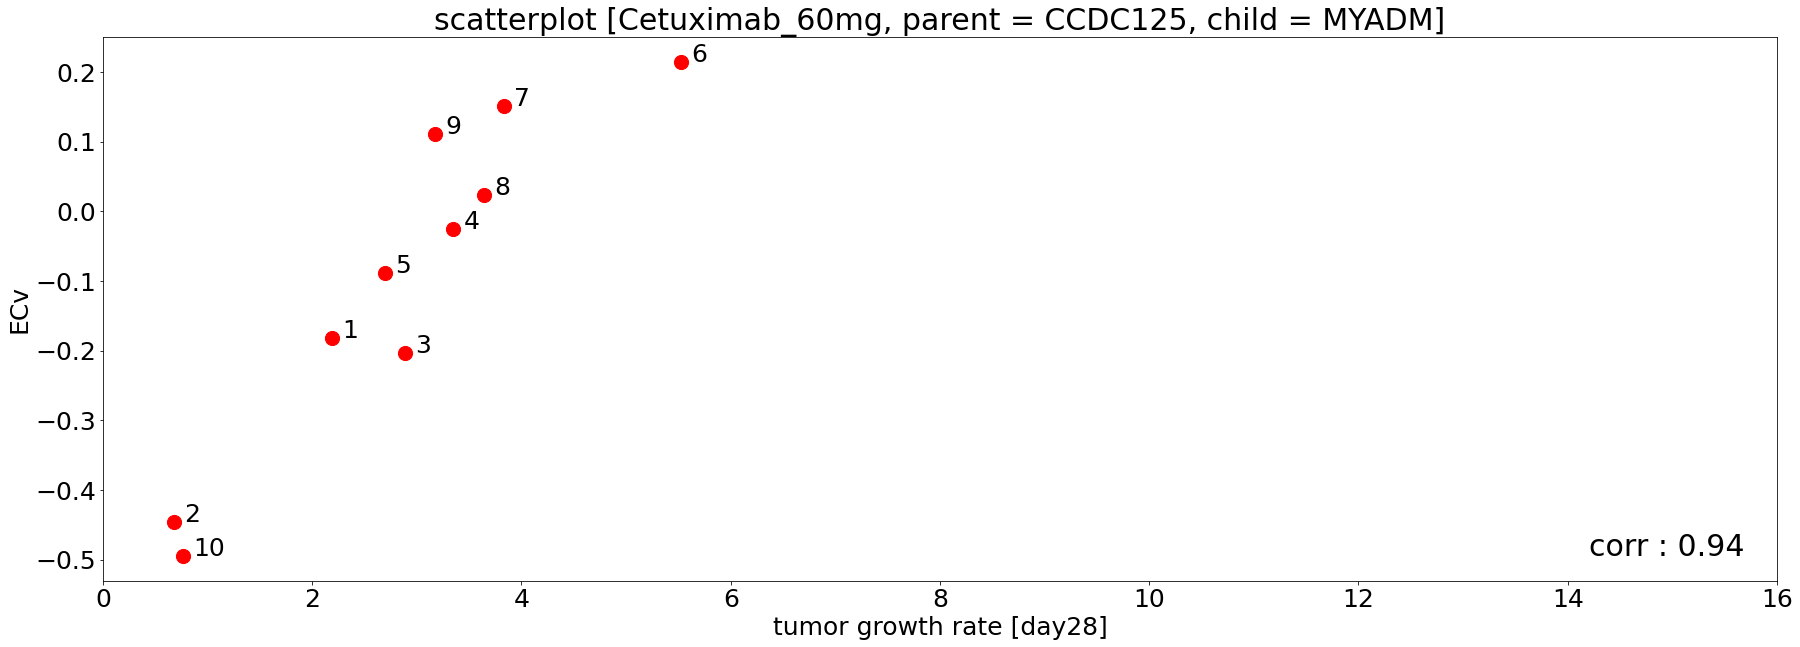

In [53]:
print(np.array(data_ecv.iloc[38705,:2]))
# array tumor growth rate & ecv
array_gr = np.array(list_gr_d28[2], dtype='float64').reshape(10,) # drug 0~6 → 1
array_ecv = np.array(data_ecv.iloc[38705,2:], dtype='float64') # ecv 0~78858 → 1
# corr
corr = np.corrcoef(array_gr, array_ecv)[0,1]

# scatter plot
plt.figure(figsize=(30, 10))
plt.rcParams["font.family"] = 'sans-serif'
plt.rcParams['font.size'] = 25
plt.title(f'scatterplot [{data_drug_name["drug_name"][2]}, parent = {data_ecv.iloc[38705,:2][0]}, child = {data_ecv.iloc[38705,:2][1]}]', fontsize=30)
plt.xlim([0,16])
#plt.ylim([0,16])
plt.xlabel('tumor growth rate [day28]', fontsize=25)
plt.ylabel('ECv', fontsize=25)
plt.text(14.2,min(array_ecv), f"corr : {round(max(list_corr), 2)}", size=30)

data_name = [1,2,3,4,5,6,7,8,9,10]
for (x,y,k) in zip(array_gr,array_ecv,data_name):
        plt.scatter(x, y, color='red', s=200)
        plt.annotate(k, xy=(x+0.1, y),size=25)

In [30]:
min(array_gr)

0.6752543779098162

In [24]:
print(max(list_corr2))
print(list_corr2.index(max(list_corr2)))

0.9335385974391887
20843


['ALG12' 'ERLIN1']


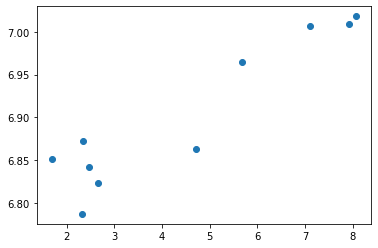

In [25]:
print(np.array(data_ecv.iloc[20843,:2]))
# array tumor growth rate
array_gr = np.array(list_gr_d28[4], dtype='float64').reshape(10,) # drug 0~6 → 1
# array ecv
array_ecv = np.array(data_ecv.iloc[20843,2:], dtype='float64') # ecv 0~78858 → 1

# corr
corr = np.corrcoef(array_gr, array_ecv)[0,1]

# scatter plot
plt.scatter(array_gr, array_ecv)

In [27]:
print(max(list_corr3))
print(list_corr3.index(max(list_corr3)))

0.9386652227053092
30668


['CTBS' 'KIAA1530']


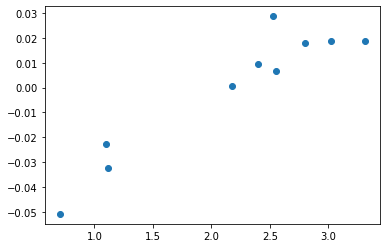

In [28]:
print(np.array(data_ecv.iloc[30668,:2]))
# array tumor growth rate
array_gr = np.array(list_gr_d28[6], dtype='float64').reshape(10,) # drug 0~6 → 1
# array ecv
array_ecv = np.array(data_ecv.iloc[30668,2:], dtype='float64') # ecv 0~78858 → 1

# corr
corr = np.corrcoef(array_gr, array_ecv)[0,1]

# scatter plot
plt.scatter(array_gr, array_ecv)

# 追加
Parent(1列目), Child(2列目), CorrelationCoefficients(3列目)、これをheaderとしてtab区切りでtxt fileに相関係数の結果をoutputする(3 fileできる)

In [42]:
data_ecv

,Parent,Child,ECv:C97-float:8,ECv:C166-float:21,ECv:C86-float:17,ECv:C111-foat:18,ECv:C45-float:5,ECv:C48-float:6,ECv:C138-float:20,ECv:CB3-float:22,ECv:C75-float:7,ECv:C132-float:19
0,ITGA7,A23747,6.594815,6.345684,6.332206,6.537262,6.373183,6.657370,6.412025,6.539362,6.445698,6.374509
1,AXL,A23747,-0.047771,-0.039535,-0.015503,-0.028371,-0.032229,-0.068649,-0.015117,0.059047,-0.061376,-0.008655
2,AP1M2,A23747,-0.392876,0.091723,-0.200845,-0.231564,-0.265686,-0.224587,-0.127154,-0.075489,-0.166920,-0.368507
3,SLAMF1,A23747,0.129603,-0.259722,-0.175755,0.067454,-0.788439,-0.312984,-0.299465,-0.210768,-0.430493,0.224160
4,FBLN1,A23747,-0.178458,-0.196188,-0.124905,-0.170777,-0.081411,-0.161160,-0.134623,0.302383,-0.153786,-0.150178
...,...,...,...,...,...,...,...,...,...,...,...,...
78854,NACAP1,lincRNA:chrX:97546119-97657219_F,0.122925,-0.000558,-0.144826,-0.103876,0.001169,0.086230,-0.059603,0.053983,0.258925,-0.065045
78855,lincRNA:chr2:107293518-107358418_R,lincRNA:chrX:97546119-97657219_F,0.009782,0.054173,-0.227011,0.016717,-0.042315,0.107339,0.158652,0.257222,0.384503,0.093524
78856,A_24_P126691,lincRNA:chrX:97546119-97657219_R,12.492665,12.495724,12.495261,12.496654,12.493486,12.494454,12.497193,12.503603,12.505451,12.498717
78857,C1orf43,lincRNA:chrX:97546119-97657219_R,0.040848,0.031341,0.047562,0.029576,0.048071,-0.001850,0.039658,0.040479,0.053610,0.055074


In [46]:
list_corr[0].shape

(78859,)

In [44]:
list_corr.shape

(7, 78859)

In [55]:
def corr_matrix(list_corr, data_ecv, data_drug_name):
    for i in range(len(list_corr)):
        data_corr = data_ecv.iloc[:,:2]
        data_corr['CorrelationCoefficients'] = list_corr[i]
        # save
        savepath = f'./result/matrix/IDEA1_2/CorrelationCoefficients_{data_drug_name["drug_name"][i]}.txt'
        data_corr.to_csv(savepath, sep='\t')
    return
corr_matrix(list_corr, data_ecv, data_drug_name)